In [145]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

military_comp_data = pd.read_csv('Military_Compensation.csv', index_col='date', parse_dates=True)
military_comp_data = military_comp_data.drop(military_comp_data.index[0])
train_size = int(len(military_comp_data) * 0.8)
train_data, test_data = military_comp_data['military_comp'][:train_size], military_comp_data['military_comp'][train_size:]


# Fit ARIMA(1,2,1) based on ACF/PACF analysis
model_1 = ARIMA(train_data, order=(1, 2, 1))
model_1_fit = model_1.fit()
forecast_1 = model_1_fit.forecast(steps=len(test_data))

# Fit ARIMA(0,2,0) based on AutoARIMA
model_2 = ARIMA(train_data, order=(0, 2, 0))
model_2_fit = model_2.fit()
forecast_2 = model_2_fit.forecast(steps=len(test_data))

# Fit ARIMA(0,2,1) based on AutoARIMA
model_3 = ARIMA(train_data, order=(0, 2, 1))
model_3_fit = model_3.fit()
forecast_3 = model_3_fit.forecast(steps=len(test_data))

# Fit ARIMA(0,2,2) based on AutoARIMA
model_4 = ARIMA(train_data, order=(0, 2, 2))
model_4_fit = model_4.fit()
forecast_4 = model_4_fit.forecast(steps=len(test_data))

# Display the model summaries and AIC/BIC values
print("ARIMA(1, 2, 1) Summary:")
print(model_1_fit.summary())
print(f"AIC: {model_1_fit.aic}, BIC: {model_1_fit.bic}\n")

print("ARIMA(0, 2, 0) Summary:")
print(model_2_fit.summary())
print(f"AIC: {model_2_fit.aic}, BIC: {model_2_fit.bic}\n")

print("ARIMA(0, 2, 1) Summary:")
print(model_3_fit.summary())
print(f"AIC: {model_3_fit.aic}, BIC: {model_3_fit.bic}\n")

print("ARIMA(0, 2, 2) Summary:")
print(model_4_fit.summary())
print(f"AIC: {model_4_fit.aic}, BIC: {model_4_fit.bic}\n")

ARIMA(1, 2, 1) Summary:
                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  103
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -161.322
Date:                Mon, 24 Nov 2025   AIC                            328.644
Time:                        15:52:28   BIC                            336.489
Sample:                    06-30-1993   HQIC                           331.820
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2079      0.116      1.790      0.073      -0.020       0.436
ma.L1         -0.6907      0.074     -9.381      0.000      -0.835      -0.546
sigma2         1.4231      0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

| Model            | AIC     | BIC     | AR(1) Coef | MA(1) Coef | MA(2) Coef | Sigma² (Variance) | Ljung-Box Q (p-value) | Jarque-Bera (p-value) | Heteroskedasticity (p-value) |
|------------------|---------|---------|------------|------------|------------|-------------------|-----------------------|-----------------------|-----------------------------|
| **ARIMA(1, 2, 1)** | 426.40  | 434.96  | 0.2101     | -0.7380    | N/A        | 1.5568            | 0.96                  | 0.00                  | 0.49                        |
| **ARIMA(0, 2, 0)** | 454.50  | 457.35  | N/A        | N/A        | N/A        | 2.0082            | 0.00                  | 0.00                  | 0.59                        |
| **ARIMA(0, 2, 1)** | 426.45  | 432.16  | N/A        | -0.6012    | N/A        | 1.5825            | 0.45                  | 0.00                  | 0.47                        |
| **ARIMA(0, 2, 2)** | 426.27  | 434.83  | N/A        | -0.5212    | -0.1391    | 1.5552            | 0.92                  | 0.00                  | 0.46                        |

In [146]:
# Compare the forecasts to the actual test data
print("One-Step-Ahead Forecasts vs Actual (Test Data):")

# Output the forecast for each model along with the actual value from the test data
print(f"ARIMA(1, 2, 1) forecast: {forecast_1[0]}, Actual: {test_data.iloc[0]}")
print(f"ARIMA(0, 2, 0) forecast: {forecast_2[0]}, Actual: {test_data.iloc[0]}")
print(f"ARIMA(0, 2, 1) forecast: {forecast_3[0]}, Actual: {test_data.iloc[0]}")
print(f"ARIMA(0, 2, 2) forecast: {forecast_4[0]}, Actual: {test_data.iloc[0]}")

One-Step-Ahead Forecasts vs Actual (Test Data):
ARIMA(1, 2, 1) forecast: 160.1624649389723, Actual: 159.184
ARIMA(0, 2, 0) forecast: 160.17699999999996, Actual: 159.184
ARIMA(0, 2, 1) forecast: 160.30706192401414, Actual: 159.184
ARIMA(0, 2, 2) forecast: 160.18332918303153, Actual: 159.184


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/2788396505.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"ARIMA(1, 2, 1) forecast: {forecast_1[0]}, Actual: {test_data.iloc[0]}")
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/2788396505.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"ARIMA(0, 2, 0) forecast: {forecast_2[0]}, Actual: {test_data.iloc[0]}")
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/2788396505.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be t

Residual Diagnostics for ARIMA(1, 2, 1):


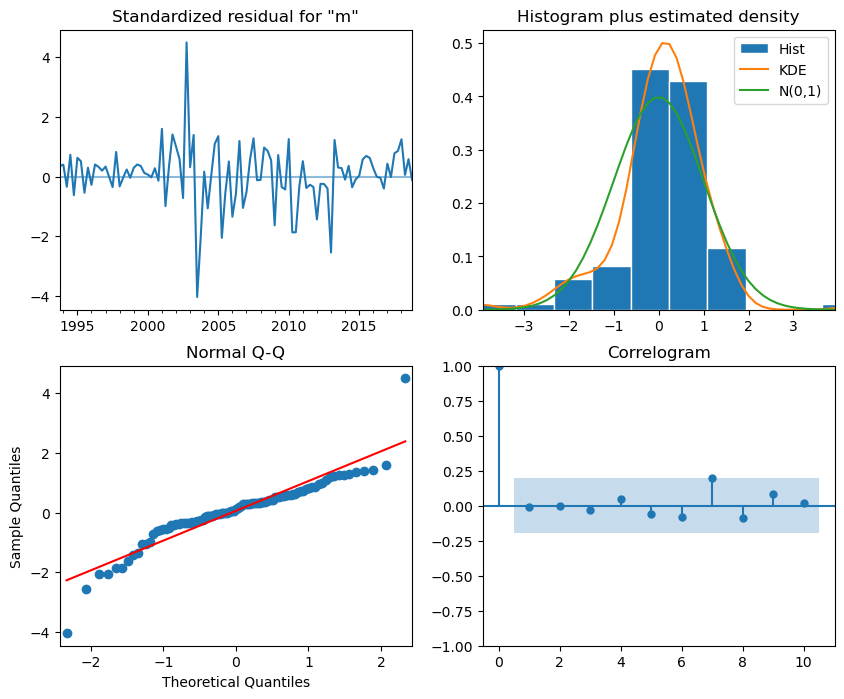

Residual Diagnostics for ARIMA(0, 2, 0):


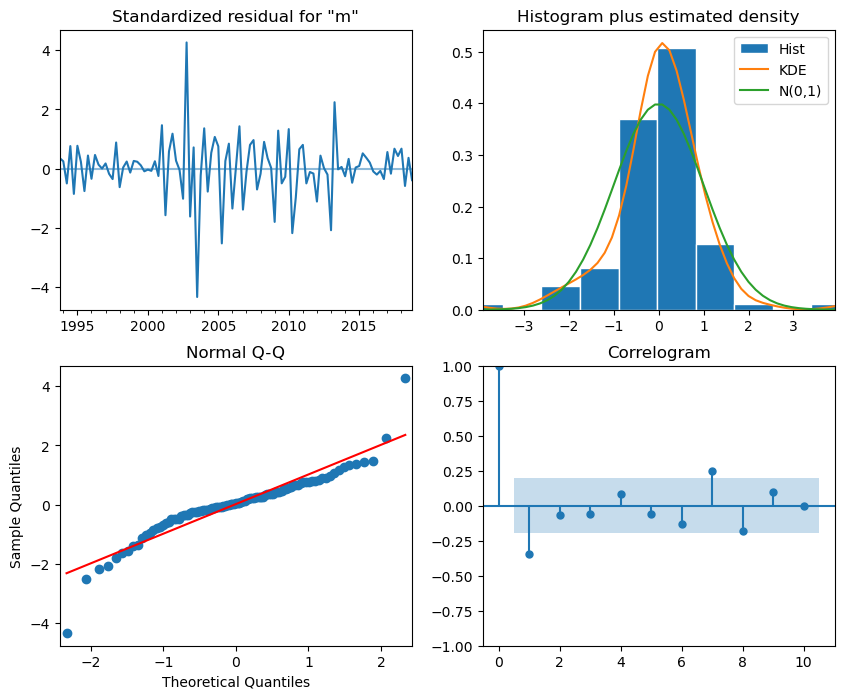

Residual Diagnostics for ARIMA(0, 2, 1):


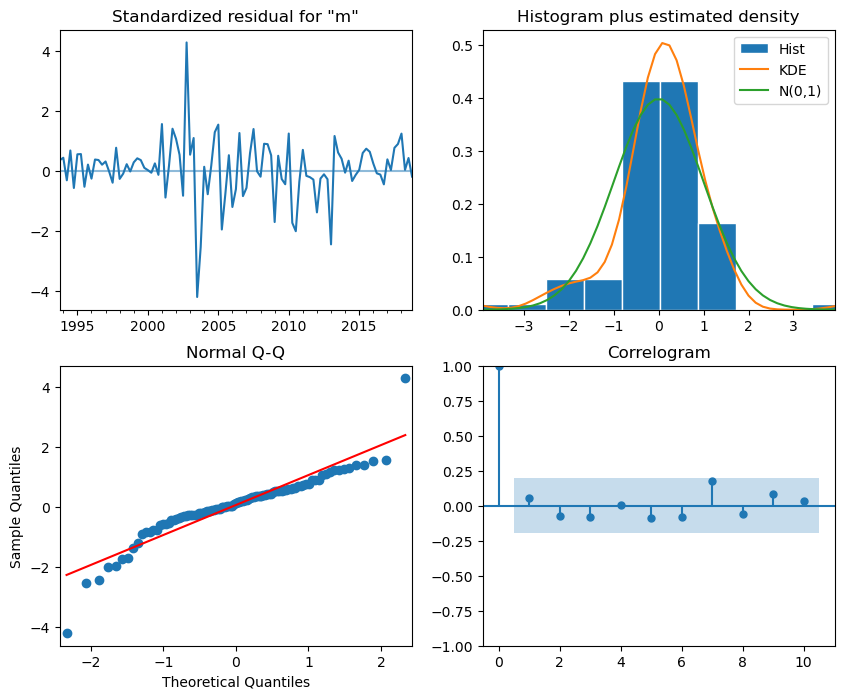

Residual Diagnostics for ARIMA(0, 2, 2):


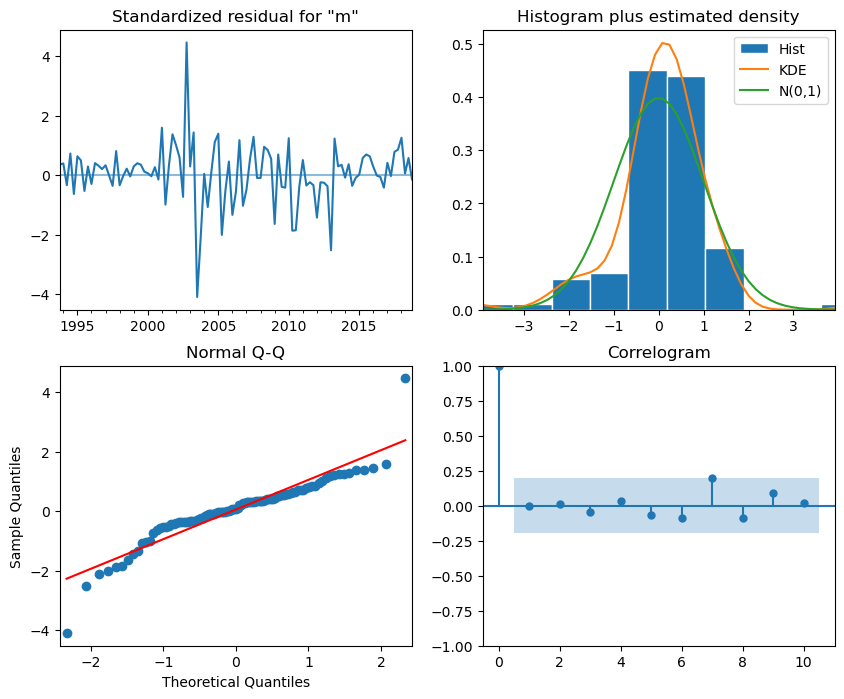

In [147]:
# Assuming the models (model_1_fit, model_2_fit, model_3_fit, model_4_fit) have already been fitted

# ARIMA(1, 2, 1)
print("Residual Diagnostics for ARIMA(1, 2, 1):")
model_1_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# ARIMA(0, 2, 0)
print("Residual Diagnostics for ARIMA(0, 2, 0):")
model_2_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# ARIMA(0, 2, 1)
print("Residual Diagnostics for ARIMA(0, 2, 1):")
model_3_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# ARIMA(0, 2, 2)
print("Residual Diagnostics for ARIMA(0, 2, 2):")
model_4_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

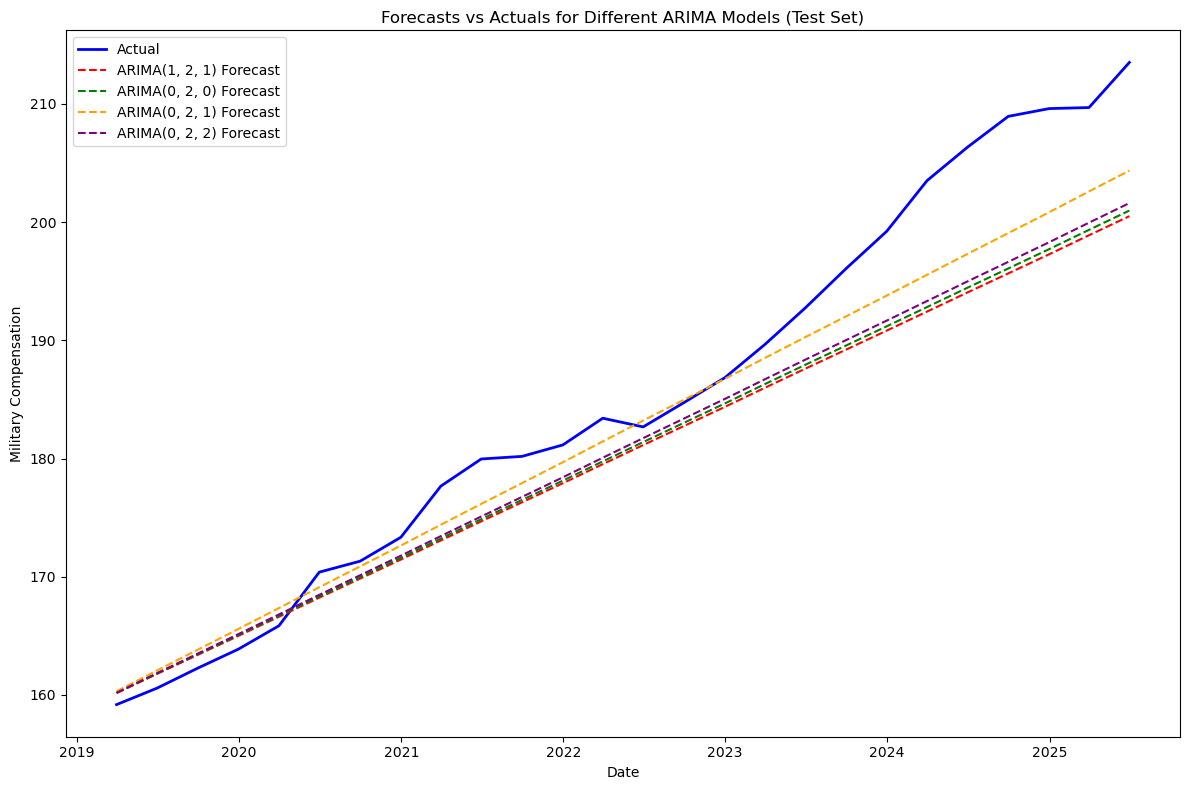

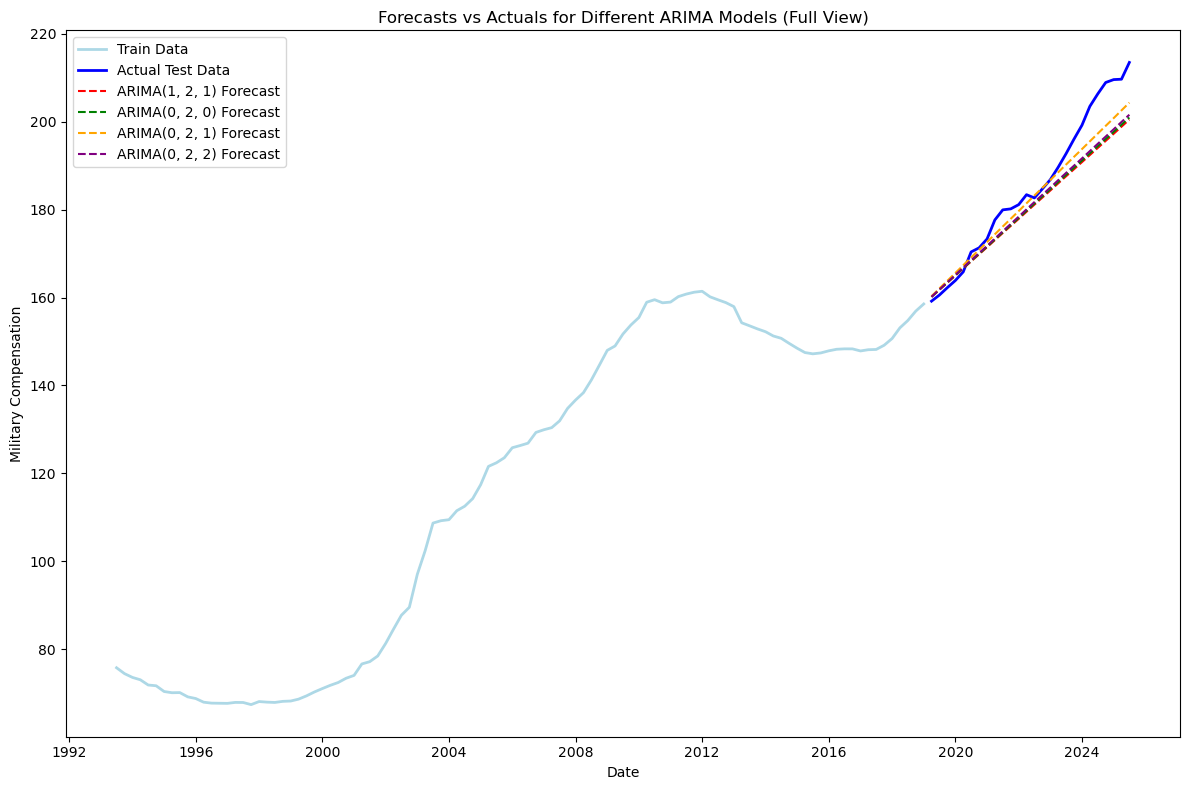

In [148]:
import matplotlib.pyplot as plt

# 1. Plot for the test set (zoomed-in version)
plt.figure(figsize=(12, 8))

# Plot actual test data
plt.plot(test_data.index, test_data.values, label='Actual', color='blue', linewidth=2)

# Plot forecasts from each model
plt.plot(test_data.index, forecast_1, label='ARIMA(1, 2, 1) Forecast', color='red', linestyle='--')
plt.plot(test_data.index, forecast_2, label='ARIMA(0, 2, 0) Forecast', color='green', linestyle='--')
plt.plot(test_data.index, forecast_3, label='ARIMA(0, 2, 1) Forecast', color='orange', linestyle='--')
plt.plot(test_data.index, forecast_4, label='ARIMA(0, 2, 2) Forecast', color='purple', linestyle='--')

# Adding labels and title
plt.title('Forecasts vs Actuals for Different ARIMA Models (Test Set)')
plt.xlabel('Date')
plt.ylabel('Military Compensation')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Full view (including training and test data)
plt.figure(figsize=(12, 8))

# Plot actual training and test data
plt.plot(military_comp_data.index[:train_size], train_data.values, label='Train Data', color='lightblue', linewidth=2)
plt.plot(test_data.index, test_data.values, label='Actual Test Data', color='blue', linewidth=2)

# Plot forecasts from each model (on the full data)
plt.plot(test_data.index, forecast_1, label='ARIMA(1, 2, 1) Forecast', color='red', linestyle='--')
plt.plot(test_data.index, forecast_2, label='ARIMA(0, 2, 0) Forecast', color='green', linestyle='--')
plt.plot(test_data.index, forecast_3, label='ARIMA(0, 2, 1) Forecast', color='orange', linestyle='--')
plt.plot(test_data.index, forecast_4, label='ARIMA(0, 2, 2) Forecast', color='purple', linestyle='--')

# Adding labels and title
plt.title('Forecasts vs Actuals for Different ARIMA Models (Full View)')
plt.xlabel('Date')
plt.ylabel('Military Compensation')
plt.legend()

plt.tight_layout()
plt.show()

Fitting ARIMAX(1, 2, 1) with Economic Variables...
ARIMAX(1, 2, 1)-eco Summary:
                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  103
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -157.947
Date:                Mon, 24 Nov 2025   AIC                            327.893
Time:                        15:52:30   BIC                            343.584
Sample:                    06-30-1993   HQIC                           334.245
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gdp_growth             -0.1598      0.171     -0.935      0.350      -0.495       0.175
eci_growth_diff         

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

ARIMAX(1, 2, 1)-both Summary:
                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  103
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -153.617
Date:                Mon, 24 Nov 2025   AIC                            331.235
Time:                        15:52:30   BIC                            362.616
Sample:                    06-30-1993   HQIC                           343.939
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
gdp_growth              -0.2006      0.193     -1.038      0.299      -0.579       0.178
eci_growth_diff          0.1933      0.231      0.836      0.403      -

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

ARIMAX(0, 2, 1)-geo Summary:
                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  103
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -154.841
Date:                Mon, 24 Nov 2025   AIC                            331.681
Time:                        15:52:30   BIC                            360.447
Sample:                    06-30-1993   HQIC                           343.327
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
gdp_growth              -0.1546      0.207     -0.748      0.455      -0.560       0.251
eci_growth_diff          0.2363      0.256      0.922      0.356      -0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  103
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -153.595
Date:                Mon, 24 Nov 2025   AIC                            331.191
Time:                        15:52:30   BIC                            362.572
Sample:                    06-30-1993   HQIC                           343.895
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
gdp_growth              -0.1955      0.204     -0.958      0.338      -0.595       0.204
eci_growth_diff          0.1783      0.227      0.784      0.433      -0.267       0.624
inflation_ra

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


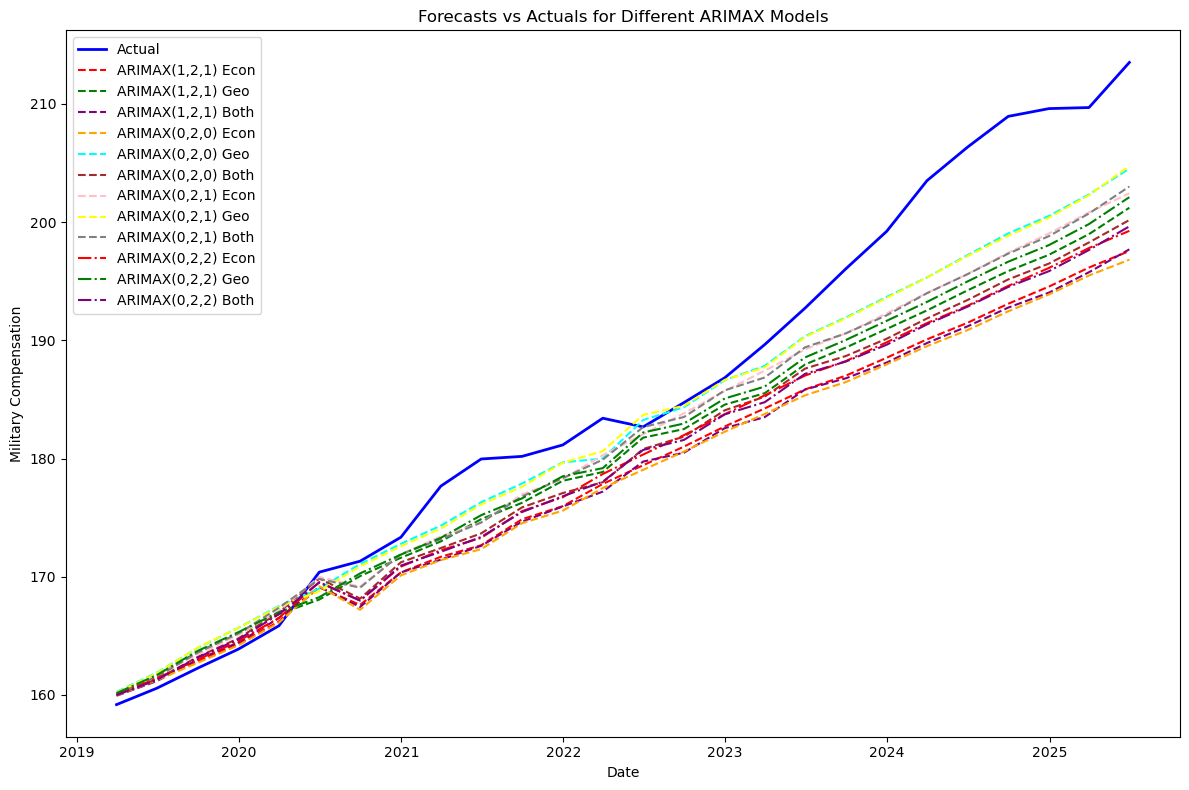

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse

# Load datasets
economic_data = pd.read_csv('economical_ready_for_modeling.csv', index_col='date', parse_dates=True)
geopolitical_data = pd.read_csv('geopolitical_ready_for_modeling.csv', index_col='date', parse_dates=True)

# Split the data into train (80%) and test (20%)
train_size = int(len(economic_data) * 0.8)
train_data = economic_data['military_comp'][:train_size]
test_data = economic_data['military_comp'][train_size:]

train_geo = geopolitical_data['military_comp'][:train_size]
test_geo = geopolitical_data['military_comp'][train_size:]

# Extract exogenous variables
econ_exog = economic_data[['gdp_growth', 'eci_growth_diff', 'inflation_rate_diff']][:train_size]
geo_exog = geopolitical_data[['geo_risk_logdiff', 'geo_threats', 'geo_acts', 'geo_risk_china_diff', 'geo_risk_russia', 'geo_risk_usa_logdiff']][:train_size]

test_econ_exog = economic_data[['gdp_growth', 'eci_growth_diff', 'inflation_rate_diff']][train_size:]
test_geo_exog = geopolitical_data[['geo_risk_logdiff', 'geo_threats', 'geo_acts', 'geo_risk_china_diff', 'geo_risk_russia', 'geo_risk_usa_logdiff']][train_size:]

# Fit ARIMAX(1,2,1), ARIMAX(0,2,0), ARIMAX(0,2,1), ARIMAX(0,2,2) for each subset

# ARIMAX(1, 2, 1) with Economic Exogenous Variables
print("Fitting ARIMAX(1, 2, 1) with Economic Variables...")
model_1_econ = ARIMA(train_data, order=(1, 2, 1), exog=econ_exog)
model_1_econ_fit = model_1_econ.fit()
forecast_1_econ = model_1_econ_fit.forecast(steps=len(test_data), exog=test_econ_exog)

print("ARIMAX(1, 2, 1)-eco Summary:")
print(model_1_econ_fit.summary())

# ARIMAX(1, 2, 1) with Geopolitical Exogenous Variables
print("Fitting ARIMAX(1, 2, 1) with Geopolitical Variables...")
model_1_geo = ARIMA(train_data, order=(1, 2, 1), exog=geo_exog)
model_1_geo_fit = model_1_geo.fit()
forecast_1_geo = model_1_geo_fit.forecast(steps=len(test_data), exog=test_geo_exog)

print("ARIMAX(1, 2, 1)-geo Summary:")
print(model_1_geo_fit.summary())

# ARIMAX(1, 2, 1) with Both Economic and Geopolitical Variables
print("Fitting ARIMAX(1, 2, 1) with Both Economic and Geopolitical Variables...")
model_1_both = ARIMA(train_data, order=(1, 2, 1), exog=pd.concat([econ_exog, geo_exog], axis=1))
model_1_both_fit = model_1_both.fit()
forecast_1_both = model_1_both_fit.forecast(steps=len(test_data), exog=pd.concat([test_econ_exog, test_geo_exog], axis=1))

print("ARIMAX(1, 2, 1)-both Summary:")
print(model_1_both_fit.summary())

# Repeat for ARIMAX(0, 2, 0), ARIMAX(0, 2, 1), ARIMAX(0, 2, 2)
# ARIMAX(0, 2, 0) with Economic Exogenous Variables
print("Fitting ARIMAX(0, 2, 0) with Economic Variables...")
model_2_econ = ARIMA(train_data, order=(0, 2, 0), exog=econ_exog)
model_2_econ_fit = model_2_econ.fit()
forecast_2_econ = model_2_econ_fit.forecast(steps=len(test_data), exog=test_econ_exog)

print("ARIMAX(0, 2, 0)-eco Summary:")
print(model_2_econ_fit.summary())

# ARIMAX(0, 2, 0) with Geopolitical Exogenous Variables
print("Fitting ARIMAX(0, 2, 0) with Geopolitical Variables...")
model_2_geo = ARIMA(train_data, order=(0, 2, 0), exog=geo_exog)
model_2_geo_fit = model_2_geo.fit()
forecast_2_geo = model_2_geo_fit.forecast(steps=len(test_data), exog=test_geo_exog)

print("ARIMAX(0, 2, 0)-geo Summary:")
print(model_2_geo_fit.summary())

# ARIMAX(0, 2, 0) with Both Economic and Geopolitical Variables
print("Fitting ARIMAX(0, 2, 0) with Both Economic and Geopolitical Variables...")
model_2_both = ARIMA(train_data, order=(0, 2, 0), exog=pd.concat([econ_exog, geo_exog], axis=1))
model_2_both_fit = model_2_both.fit()
forecast_2_both = model_2_both_fit.forecast(steps=len(test_data), exog=pd.concat([test_econ_exog, test_geo_exog], axis=1))

print("ARIMAX(0, 2, 0)-mix Summary:")
print(model_2_both_fit.summary())

# ARIMAX(0, 2, 1) with Economic Exogenous Variables
print("Fitting ARIMAX(0, 2, 1) with Economic Variables...")
model_3_econ = ARIMA(train_data, order=(0, 2, 1), exog=econ_exog)
model_3_econ_fit = model_3_econ.fit()
forecast_3_econ = model_3_econ_fit.forecast(steps=len(test_data), exog=test_econ_exog)

print("ARIMAX(0, 2, 1)-eco Summary:")
print(model_3_both_fit.summary())

# ARIMAX(0, 2, 1) with Geopolitical Exogenous Variables
print("Fitting ARIMAX(0, 2, 1) with Geopolitical Variables...")
model_3_geo = ARIMA(train_data, order=(0, 2, 1), exog=geo_exog)
model_3_geo_fit = model_3_geo.fit()
forecast_3_geo = model_3_geo_fit.forecast(steps=len(test_data), exog=test_geo_exog)

print("ARIMAX(0, 2, 1)-geo Summary:")
print(model_3_both_fit.summary())

# ARIMAX(0, 2, 1) with Both Economic and Geopolitical Variables
print("Fitting ARIMAX(0, 2, 1) with Both Economic and Geopolitical Variables...")
model_3_both = ARIMA(train_data, order=(0, 2, 1), exog=pd.concat([econ_exog, geo_exog], axis=1))
model_3_both_fit = model_3_both.fit()
forecast_3_both = model_3_both_fit.forecast(steps=len(test_data), exog=pd.concat([test_econ_exog, test_geo_exog], axis=1))

print("ARIMAX(0, 2, 1)-mix Summary:")
print(model_3_both_fit.summary())

# ARIMAX(0, 2, 2) with Economic Exogenous Variables
print("Fitting ARIMAX(0, 2, 2) with Economic Variables...")
model_4_econ = ARIMA(train_data, order=(0, 2, 2), exog=econ_exog)
model_4_econ_fit = model_4_econ.fit()
forecast_4_econ = model_4_econ_fit.forecast(steps=len(test_data), exog=test_econ_exog)


print("ARIMAX(0, 2, 2)-eco Summary:")
print(model_4_both_fit.summary())

# ARIMAX(0, 2, 2) with Geopolitical Exogenous Variables
print("Fitting ARIMAX(0, 2, 2) with Geopolitical Variables...")
model_4_geo = ARIMA(train_data, order=(0, 2, 2), exog=geo_exog)
model_4_geo_fit = model_4_geo.fit()
forecast_4_geo = model_4_geo_fit.forecast(steps=len(test_data), exog=test_geo_exog)


print("ARIMAX(0, 2, 2)-geo Summary:")
print(model_4_both_fit.summary())

# ARIMAX(0, 2, 2) with Both Economic and Geopolitical Variables
print("Fitting ARIMAX(0, 2, 2) with Both Economic and Geopolitical Variables...")
model_4_both = ARIMA(train_data, order=(0, 2, 2), exog=pd.concat([econ_exog, geo_exog], axis=1))
model_4_both_fit = model_4_both.fit()
forecast_4_both = model_4_both_fit.forecast(steps=len(test_data), exog=pd.concat([test_econ_exog, test_geo_exog], axis=1))

print("ARIMAX(0, 2, 2)-mix Summary:")
print(model_4_both_fit.summary())


# Now we can compare all the forecasts to the actual values
# Plot all forecasts on a single plot

plt.figure(figsize=(12, 8))

# Plot actual test data
plt.plot(test_data.index, test_data.values, label='Actual', color='blue', linewidth=2)

# Plot forecasts from each model
plt.plot(test_data.index, forecast_1_econ, label='ARIMAX(1,2,1) Econ', color='red', linestyle='--')
plt.plot(test_data.index, forecast_1_geo, label='ARIMAX(1,2,1) Geo', color='green', linestyle='--')
plt.plot(test_data.index, forecast_1_both, label='ARIMAX(1,2,1) Both', color='purple', linestyle='--')

plt.plot(test_data.index, forecast_2_econ, label='ARIMAX(0,2,0) Econ', color='orange', linestyle='--')
plt.plot(test_data.index, forecast_2_geo, label='ARIMAX(0,2,0) Geo', color='cyan', linestyle='--')
plt.plot(test_data.index, forecast_2_both, label='ARIMAX(0,2,0) Both', color='brown', linestyle='--')

plt.plot(test_data.index, forecast_3_econ, label='ARIMAX(0,2,1) Econ', color='pink', linestyle='--')
plt.plot(test_data.index, forecast_3_geo, label='ARIMAX(0,2,1) Geo', color='yellow', linestyle='--')
plt.plot(test_data.index, forecast_3_both, label='ARIMAX(0,2,1) Both', color='grey', linestyle='--')

plt.plot(test_data.index, forecast_4_econ, label='ARIMAX(0,2,2) Econ', color='red', linestyle='-.')
plt.plot(test_data.index, forecast_4_geo, label='ARIMAX(0,2,2) Geo', color='green', linestyle='-.')
plt.plot(test_data.index, forecast_4_both, label='ARIMAX(0,2,2) Both', color='purple', linestyle='-.')

# Adding labels and title
plt.title('Forecasts vs Actuals for Different ARIMAX Models')
plt.xlabel('Date')
plt.ylabel('Military Compensation')
plt.legend()

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

Fitting ARIMAX model with order (1, 2, 1)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


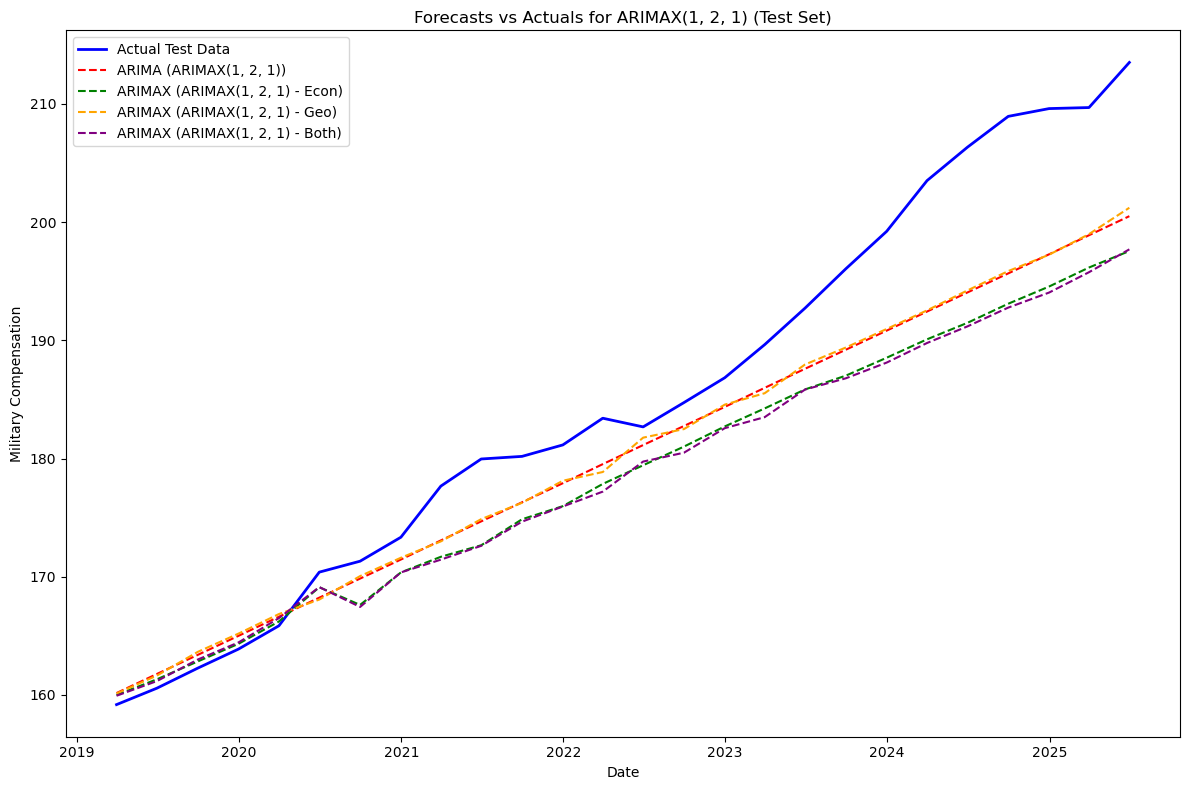

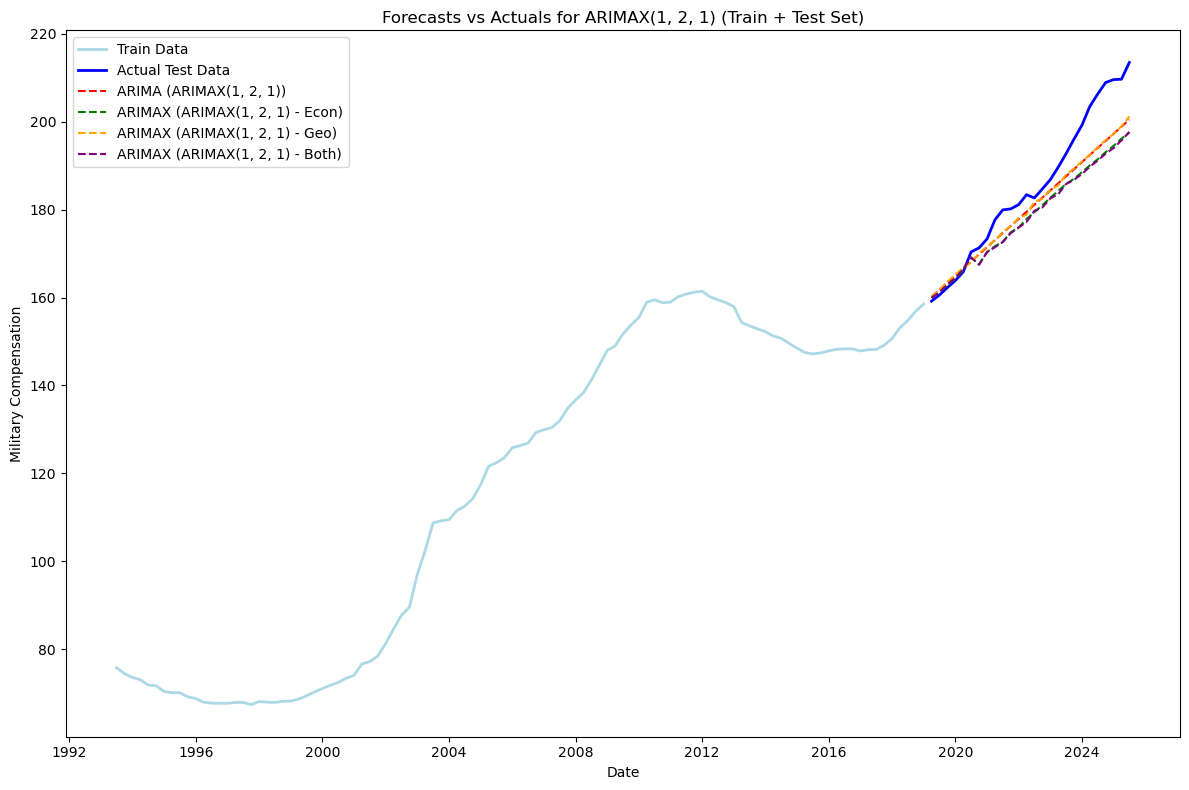

Fitting ARIMAX model with order (0, 2, 0)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

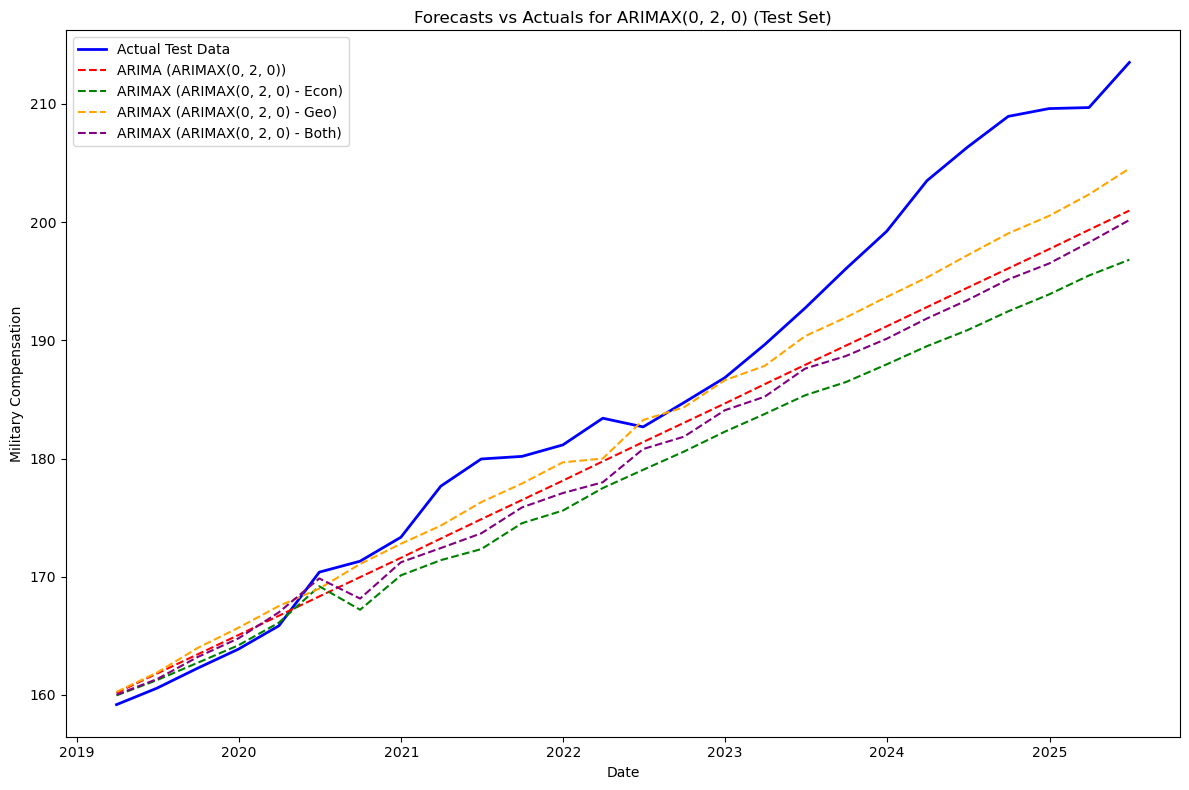

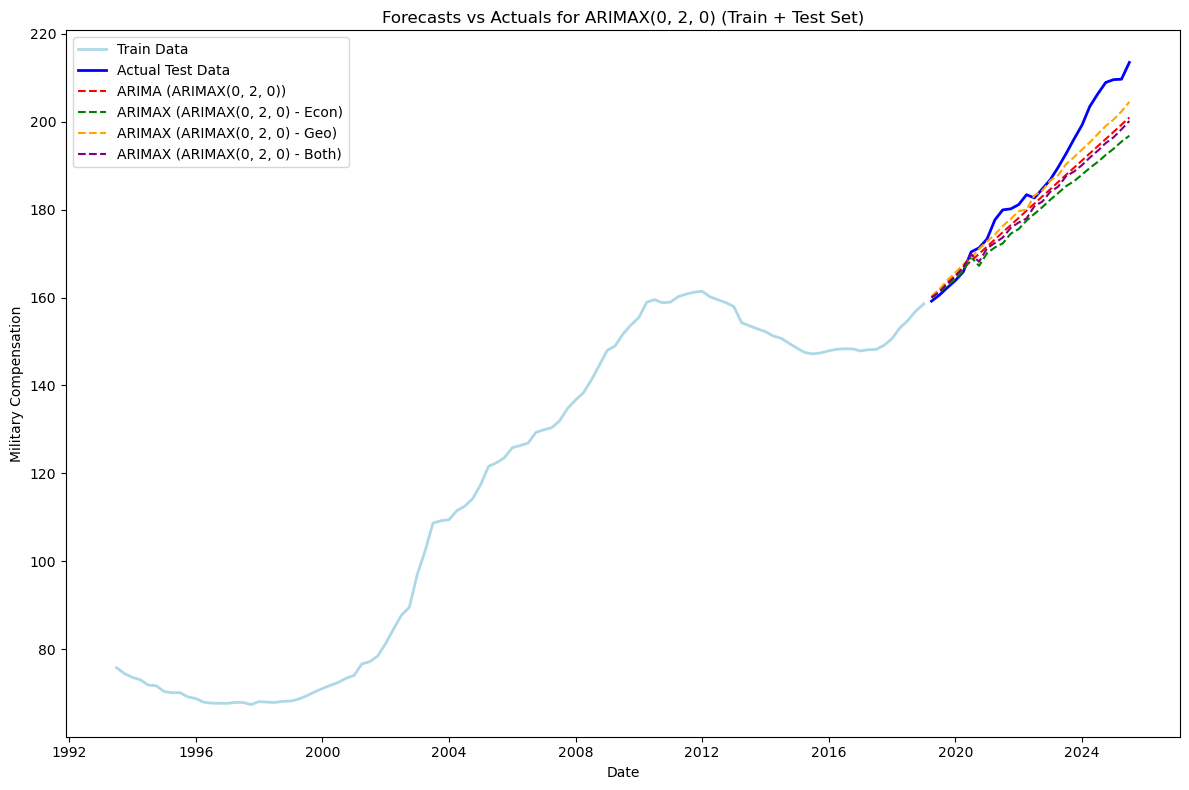

Fitting ARIMAX model with order (0, 2, 1)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

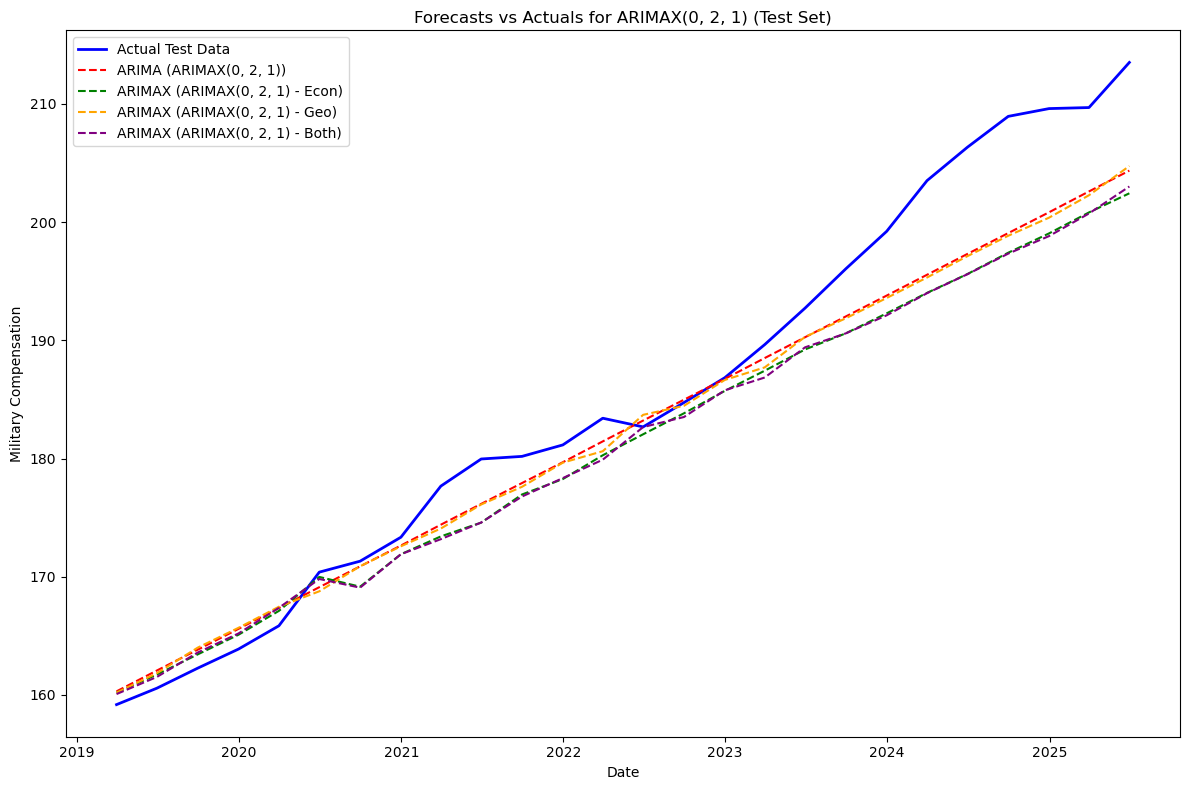

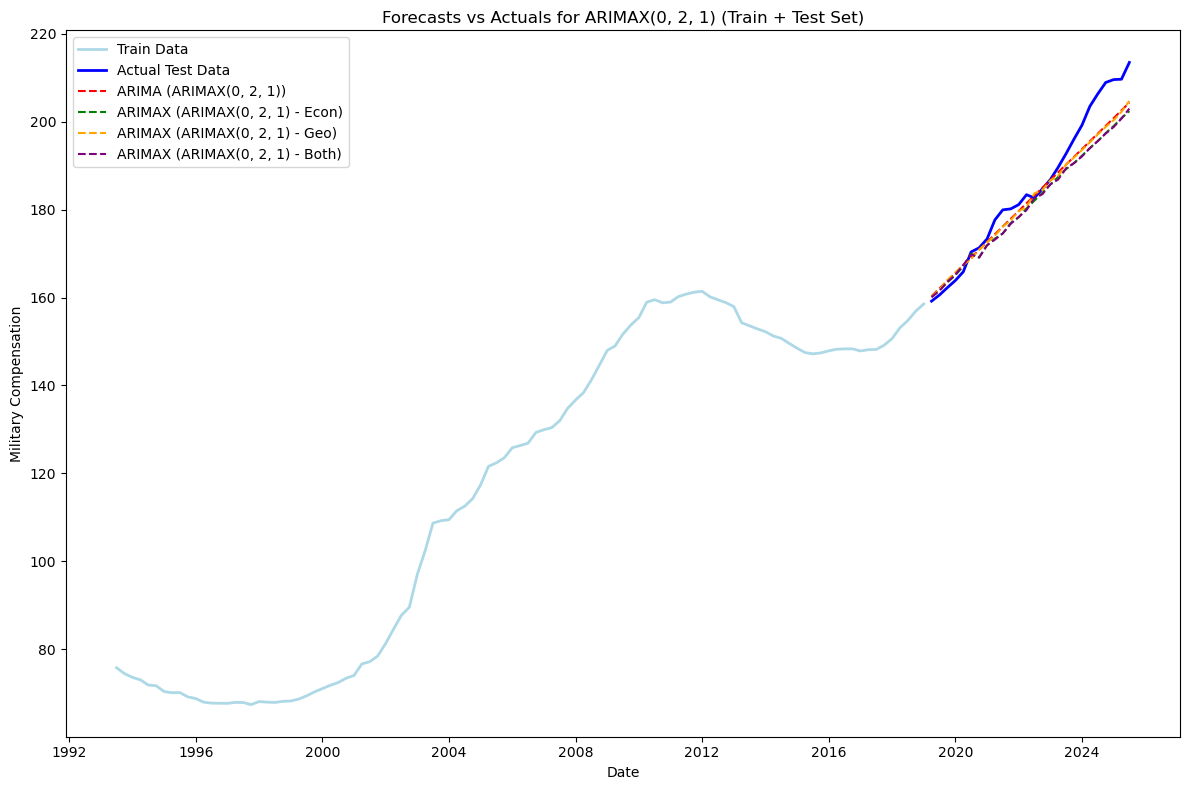

Fitting ARIMAX model with order (0, 2, 2)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

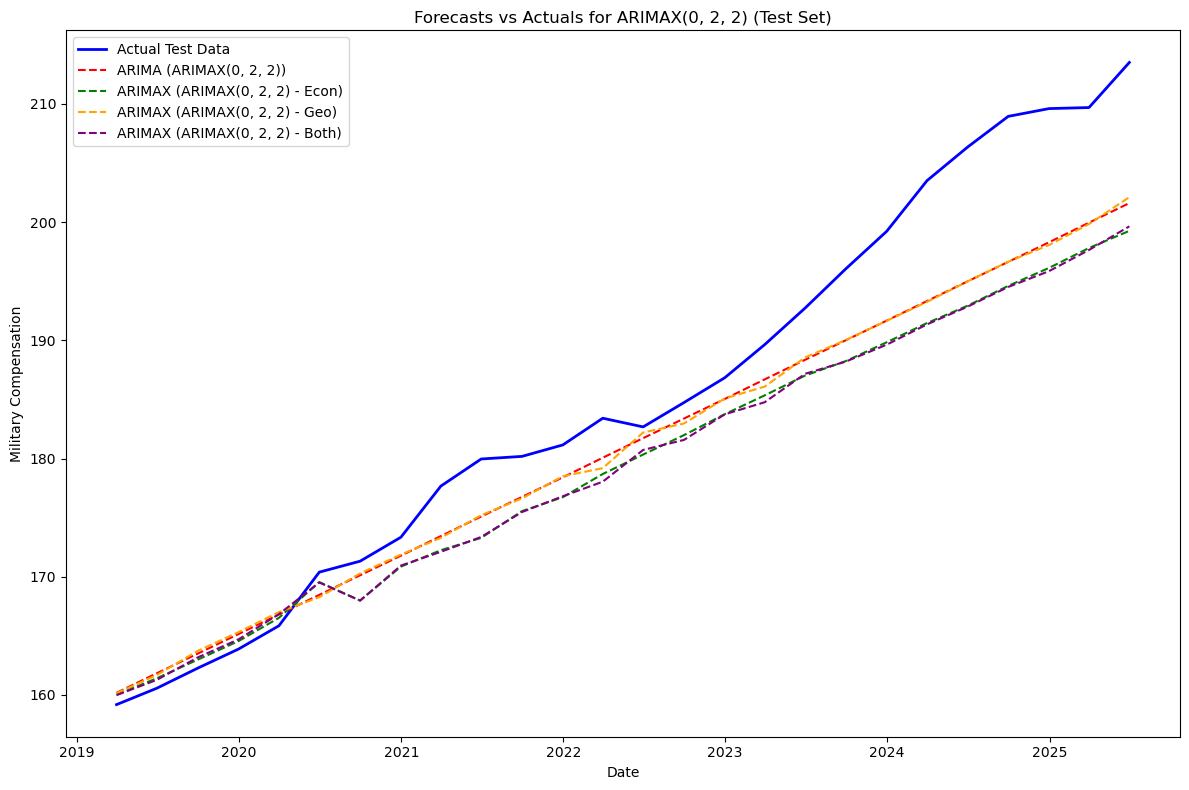

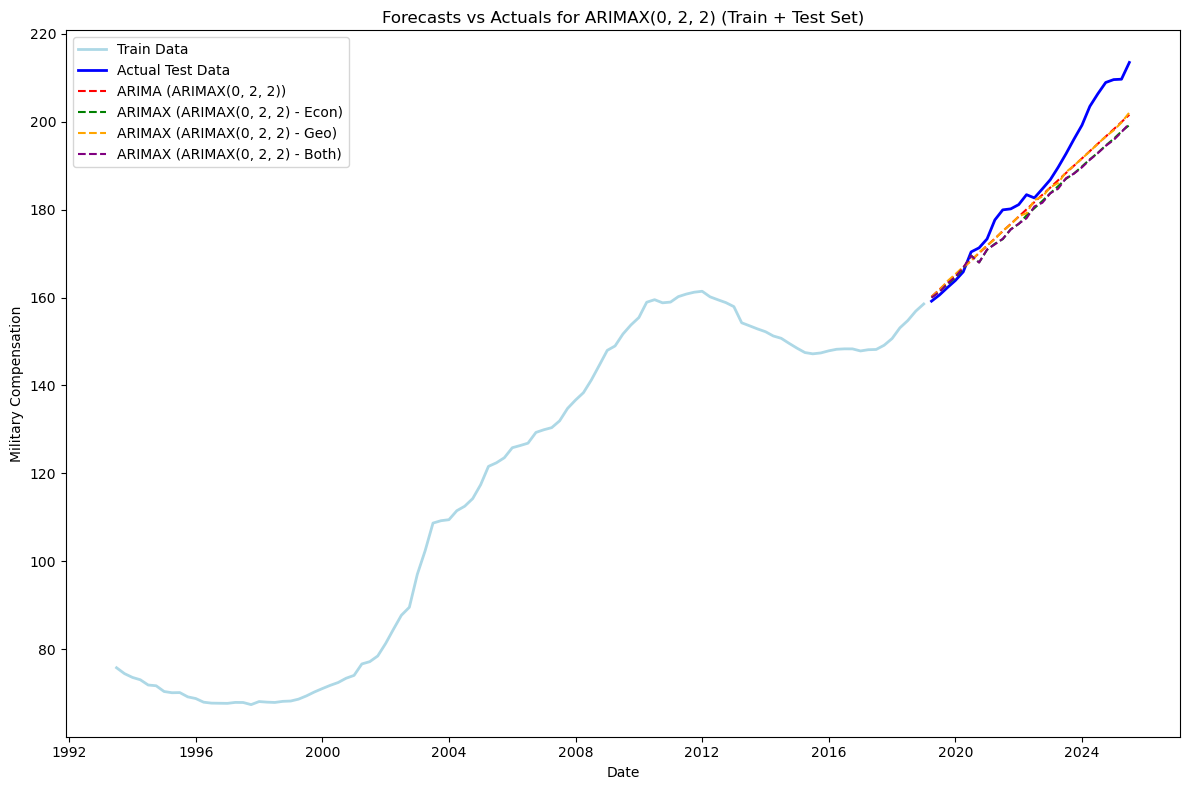

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to fit and forecast the models
def fit_forecast_arima(train_data, test_data, train_exog, test_exog, order, model_name):
    model = ARIMA(train_data, order=order, exog=train_exog)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data), exog=test_exog)
    return model_fit, forecast

# Function to plot results
def plot_results(train_data, test_data, forecast_arima, forecast_arimax_econ, forecast_arimax_geo, forecast_arimax_both, test_data_index, model_name):
    # Plot for the test set
    plt.figure(figsize=(12, 8))

    # Plot actual test data
    plt.plot(test_data_index, test_data.values, label='Actual Test Data', color='blue', linewidth=2)

    # Plot forecasts from ARIMA
    plt.plot(test_data_index, forecast_arima, label=f'ARIMA ({model_name})', color='red', linestyle='--')

    # Plot forecasts from ARIMAX (Economic)
    plt.plot(test_data_index, forecast_arimax_econ, label=f'ARIMAX ({model_name} - Econ)', color='green', linestyle='--')

    # Plot forecasts from ARIMAX (Geopolitical)
    plt.plot(test_data_index, forecast_arimax_geo, label=f'ARIMAX ({model_name} - Geo)', color='orange', linestyle='--')

    # Plot forecasts from ARIMAX (Both)
    plt.plot(test_data_index, forecast_arimax_both, label=f'ARIMAX ({model_name} - Both)', color='purple', linestyle='--')

    # Adding labels and title
    plt.title(f'Forecasts vs Actuals for {model_name} (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Military Compensation')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot for the full dataset (train + test)
    plt.figure(figsize=(12, 8))

    # Plot training data
    plt.plot(train_data.index, train_data.values, label='Train Data', color='lightblue', linewidth=2)

    # Plot actual test data
    plt.plot(test_data_index, test_data.values, label='Actual Test Data', color='blue', linewidth=2)

    # Plot forecasts from ARIMA
    plt.plot(test_data_index, forecast_arima, label=f'ARIMA ({model_name})', color='red', linestyle='--')

    # Plot forecasts from ARIMAX (Economic)
    plt.plot(test_data_index, forecast_arimax_econ, label=f'ARIMAX ({model_name} - Econ)', color='green', linestyle='--')

    # Plot forecasts from ARIMAX (Geopolitical)
    plt.plot(test_data_index, forecast_arimax_geo, label=f'ARIMAX ({model_name} - Geo)', color='orange', linestyle='--')

    # Plot forecasts from ARIMAX (Both)
    plt.plot(test_data_index, forecast_arimax_both, label=f'ARIMAX ({model_name} - Both)', color='purple', linestyle='--')

    # Adding labels and title
    plt.title(f'Forecasts vs Actuals for {model_name} (Train + Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Military Compensation')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define the parameters for ARIMAX models
orders = [
    (1, 2, 1),  # ARIMAX(1, 2, 1)
    (0, 2, 0),  # ARIMAX(0, 2, 0)
    (0, 2, 1),  # ARIMAX(0, 2, 1)
    (0, 2, 2)   # ARIMAX(0, 2, 2)
]

# Assume we have already split the data into training and testing sets:
# train_data, test_data, econ_exog, geo_exog, test_econ_exog, test_geo_exog are predefined

for order in orders:
    print(f"Fitting ARIMAX model with order {order}...")
    
    # Fit ARIMAX for ARIMA model with no exogenous variables
    model_arima, forecast_arima = fit_forecast_arima(train_data, test_data, None, None, order, f"ARIMA{order}")
    
    # ARIMAX with Economic variables
    model_arimax_econ, forecast_arimax_econ = fit_forecast_arima(train_data, test_data, econ_exog, test_econ_exog, order, f"ARIMAX {order} - Economic")
    
    # ARIMAX with Geopolitical variables
    model_arimax_geo, forecast_arimax_geo = fit_forecast_arima(train_data, test_data, geo_exog, test_geo_exog, order, f"ARIMAX {order} - Geopolitical")
    
    # ARIMAX with Both Economic and Geopolitical variables
    model_arimax_both, forecast_arimax_both = fit_forecast_arima(train_data, test_data, pd.concat([econ_exog, geo_exog], axis=1), pd.concat([test_econ_exog, test_geo_exog], axis=1), order, f"ARIMAX {order} - Both")

    # Plot results for each model
    plot_results(train_data, test_data, forecast_arima, forecast_arimax_econ, forecast_arimax_geo, forecast_arimax_both, test_data.index, f"ARIMAX{order}")

In [151]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse, meanabs
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# ---------------------------------------
# Function to fit models and evaluate them
# ---------------------------------------
def evaluate_model(train_data, test_data, train_exog, test_exog, order, model_name):
    # Fit ARIMA / ARIMAX model
    model = ARIMA(train_data, order=order, exog=train_exog)
    model_fit = model.fit()
    
    # Forecast the test data
    forecast = model_fit.forecast(steps=len(test_data), exog=test_exog)
    
    # ------------ TRAIN METRICS ------------
    # In-sample fitted values and residuals
    fitted = model_fit.fittedvalues

    # Align indices to avoid initial NaNs
    common_idx = fitted.index.intersection(train_data.index)
    fitted = fitted.loc[common_idx]
    train_aligned = train_data.loc[common_idx]
    train_resid = train_aligned - fitted

    rmse_train = rmse(train_aligned, fitted)
    mae_train = meanabs(train_aligned, fitted)

    # ------------ TEST METRICS ------------
    # Align test and forecast (just in case)
    forecast = forecast.astype(float)
    test_aligned = test_data.loc[forecast.index]
    rmse_test = rmse(test_aligned, forecast)
    mae_test = meanabs(test_aligned, forecast)
    test_resid = test_aligned - forecast

    # ------------ RESIDUAL DIAGNOSTICS (TRAIN) ------------
    train_resid_mean = train_resid.mean()
    train_resid_std = train_resid.std()

    lb_train = acorr_ljungbox(train_resid, lags=[10], return_df=True)
    lb_p_train = lb_train["lb_pvalue"].iloc[-1]

    jb_stat_train, jb_p_train, _, _ = jarque_bera(train_resid)

    # ------------ RESIDUAL DIAGNOSTICS (TEST) ------------
    test_resid_mean = test_resid.mean()
    test_resid_std = test_resid.std()

    if len(test_resid) > 10:
        lb_test = acorr_ljungbox(test_resid, lags=[min(10, len(test_resid)-1)], return_df=True)
        lb_p_test = lb_test["lb_pvalue"].iloc[-1]
        jb_stat_test, jb_p_test, _, _ = jarque_bera(test_resid)
    else:
        lb_p_test = np.nan
        jb_p_test = np.nan

    # ------------ INFORMATION CRITERIA ------------
    aic = model_fit.aic
    bic = model_fit.bic

    return {
        "Model": model_name,
        "Order": order,
        "AIC": aic,
        "BIC": bic,
        "RMSE_train": rmse_train,
        "MAE_train": mae_train,
        "RMSE_test": rmse_test,
        "MAE_test": mae_test,
        "Train_resid_mean": train_resid_mean,
        "Train_resid_std": train_resid_std,
        "Test_resid_mean": test_resid_mean,
        "Test_resid_std": test_resid_std,
        "LB_p_train": lb_p_train,
        "JB_p_train": jb_p_train,
        "LB_p_test": lb_p_test,
        "JB_p_test": jb_p_test,
    }


# ---------------------------------------
# Function to summarize all models
# ---------------------------------------
def summarize_models(train_data, test_data,
                     econ_exog, geo_exog,
                     test_econ_exog, test_geo_exog,
                     orders):
    results = []
    
    for order in orders:
        print(f"Evaluating ARIMAX model with order {order}...")

        # ARIMA (no exogenous variables)
        model_arima = evaluate_model(
            train_data, test_data,
            train_exog=None, test_exog=None,
            order=order,
            model_name=f"ARIMA{order}"
        )
        results.append(model_arima)
        
        # ARIMAX with economic variables
        model_arimax_econ = evaluate_model(
            train_data, test_data,
            train_exog=econ_exog, test_exog=test_econ_exog,
            order=order,
            model_name=f"ARIMAX{order} - Econ"
        )
        results.append(model_arimax_econ)
        
        # ARIMAX with geopolitical variables
        model_arimax_geo = evaluate_model(
            train_data, test_data,
            train_exog=geo_exog, test_exog=test_geo_exog,
            order=order,
            model_name=f"ARIMAX{order} - Geo"
        )
        results.append(model_arimax_geo)
        
        # ARIMAX with both economic and geopolitical variables
        both_train_exog = pd.concat([econ_exog, geo_exog], axis=1)
        both_test_exog = pd.concat([test_econ_exog, test_geo_exog], axis=1)

        model_arimax_both = evaluate_model(
            train_data, test_data,
            train_exog=both_train_exog, test_exog=both_test_exog,
            order=order,
            model_name=f"ARIMAX{order} - Both"
        )
        results.append(model_arimax_both)
    
    results_df = pd.DataFrame(results)
    return results_df

# ---------------------------------------
# Define the orders (models to evaluate)
# ---------------------------------------
orders = [
    (1, 2, 1),  # ARIMAX(1, 2, 1)
    (0, 2, 0),  # ARIMAX(0, 2, 0)
    (0, 2, 1),  # ARIMAX(0, 2, 1)
    (0, 2, 2)   # ARIMAX(0, 2, 2)
]

# Assuming the training and test sets are already defined:
# train_data, test_data,
# econ_exog, geo_exog,
# test_econ_exog, test_geo_exog

model_summary = summarize_models(
    train_data, test_data,
    econ_exog, geo_exog,
    test_econ_exog, test_geo_exog,
    orders
)

print(model_summary)

Evaluating ARIMAX model with order (1, 2, 1)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

Evaluating ARIMAX model with order (0, 2, 0)...
Evaluating ARIMAX model with order (0, 2, 1)...


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

Evaluating ARIMAX model with order (0, 2, 2)...
                     Model      Order         AIC         BIC  RMSE_train  \
0           ARIMA(1, 2, 1)  (1, 2, 1)  328.644134  336.489496    8.488056   
1   ARIMAX(1, 2, 1) - Econ  (1, 2, 1)  327.893228  343.583952    8.504102   
2    ARIMAX(1, 2, 1) - Geo  (1, 2, 1)  333.765873  357.301958    8.426077   
3   ARIMAX(1, 2, 1) - Both  (1, 2, 1)  331.234524  362.615971    8.462569   
4           ARIMA(0, 2, 0)  (0, 2, 0)  346.639829  349.254949    8.508367   
5   ARIMAX(0, 2, 0) - Econ  (0, 2, 0)  342.384531  352.845013    8.519507   
6    ARIMAX(0, 2, 0) - Geo  (0, 2, 0)  350.418552  368.724395    8.497331   
7   ARIMAX(0, 2, 0) - Both  (0, 2, 0)  343.902651  370.053856    8.516900   
8           ARIMA(0, 2, 1)  (0, 2, 1)  328.065448  333.295689    8.489238   
9   ARIMAX(0, 2, 1) - Econ  (0, 2, 1)  328.299223  341.374826    8.507700   
10   ARIMAX(0, 2, 1) - Geo  (0, 2, 1)  333.018027  353.938992    8.404655   
11  ARIMAX(0, 2, 1) - Both  

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Best Arima MODEL: ARIMA(0, 2, 1) 
# Best ARIMAX MODEL: ARIMAX(0,2,0)-Geopolitical
# AMONG TWO: ARIMA(SLIGHTLY BETTER)


===== ARIMA(0, 2, 1) =====
Train RMSE: 8.4892, Train MAE: 1.9142
Test  RMSE: 4.6268, Test  MAE: 3.3993
Train residual mean: 0.4191, std: 8.5203
Test  residual mean: 2.7709, std: 3.7787
Ljung–Box p-value (train, lag 10): 0.0724
Jarque–Bera p-value (train):       0.0000
Ljung–Box p-value (test):          0.0000
Jarque–Bera p-value (test):        0.2705

===== ARIMAX(0, 2, 0) - Geo =====
Train RMSE: 8.4973, Train MAE: 1.9692
Test  RMSE: 4.7257, Test  MAE: 3.5240
Train residual mean: 0.3849, std: 8.5301
Test  residual mean: 2.8956, std: 3.8086
Ljung–Box p-value (train, lag 10): 0.0601
Jarque–Bera p-value (train):       0.0000
Ljung–Box p-value (test):          0.0000
Jarque–Bera p-value (test):        0.3054


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

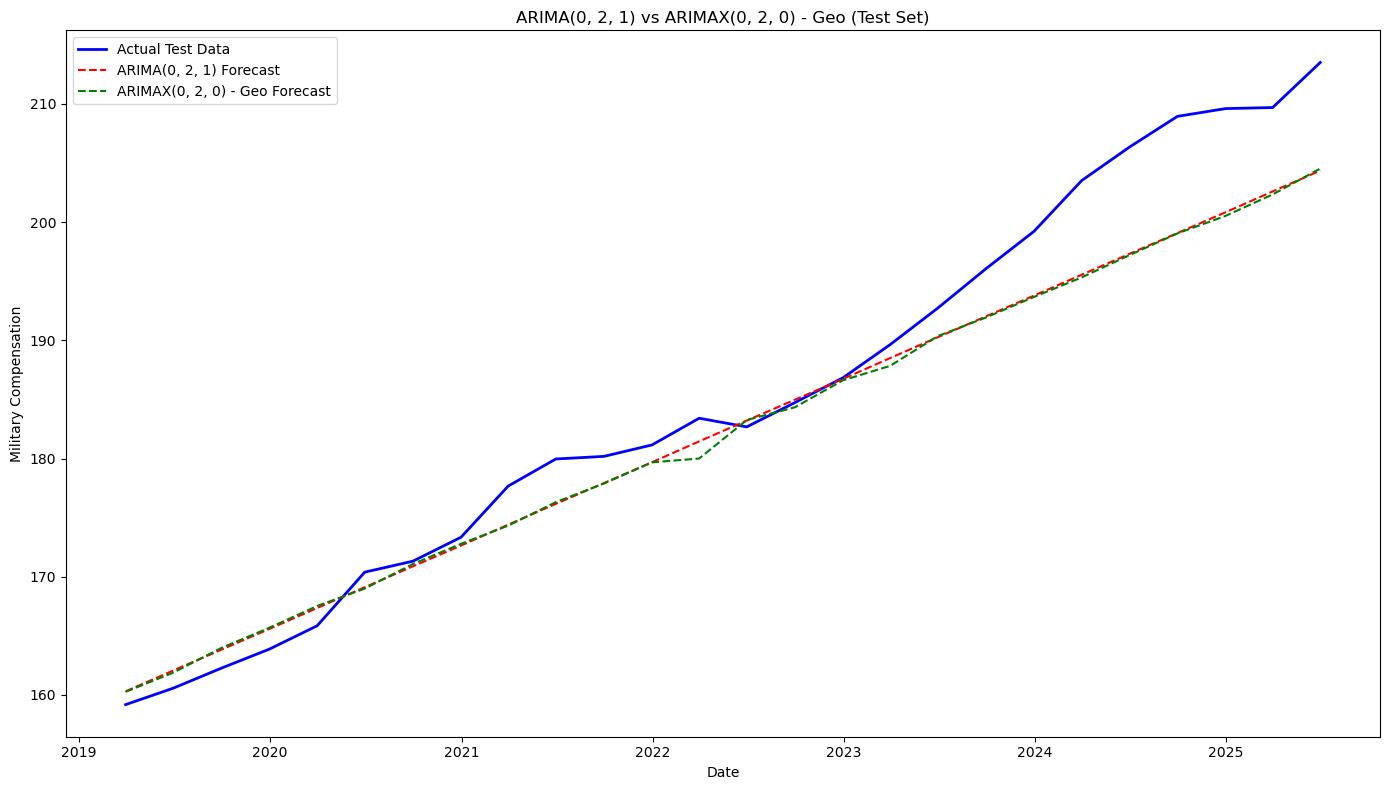

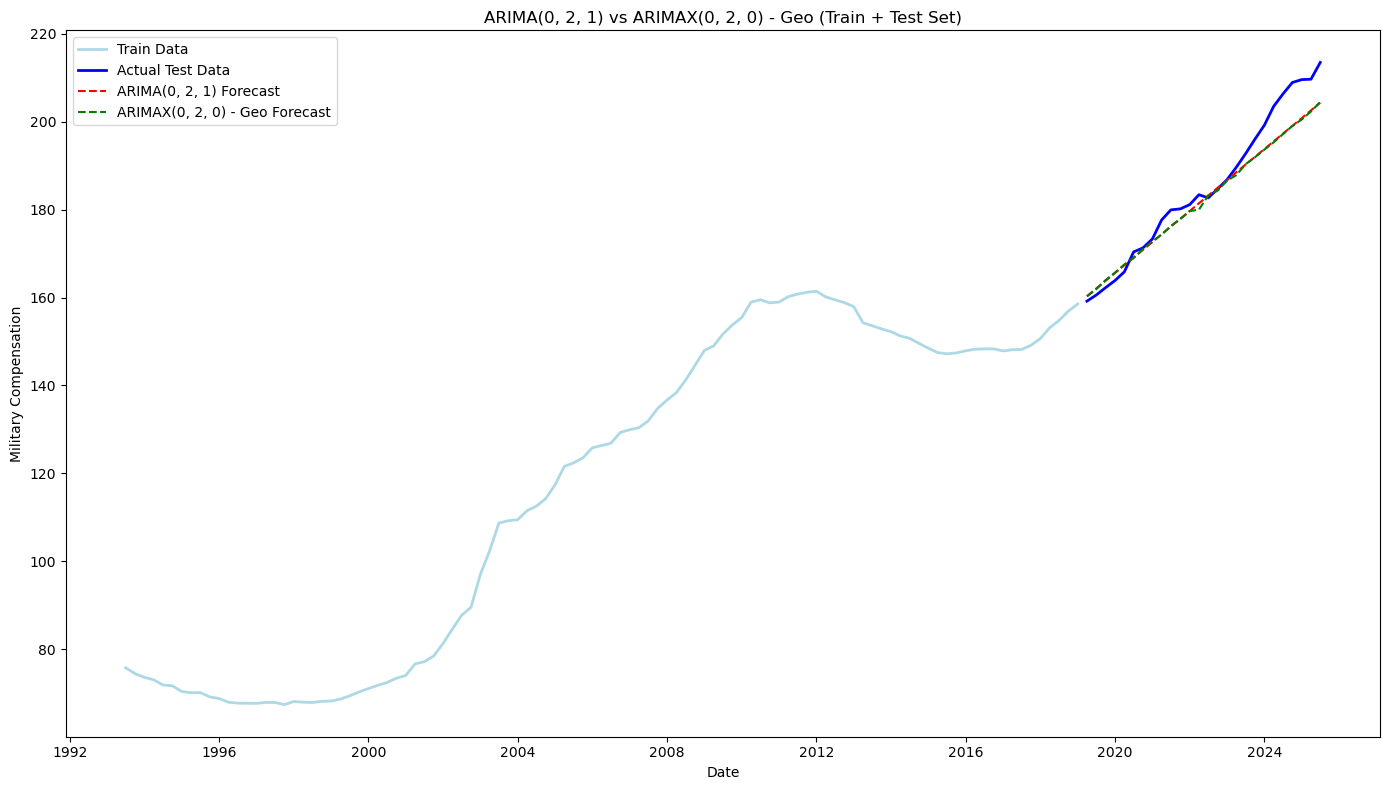

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# Assuming:
# - train_data, test_data are pandas Series (target)
# - geo_exog, test_geo_exog are DataFrames with exogenous vars for train/test

# 1. Fit ARIMA(0, 2, 1) model
arima_model = ARIMA(train_data, order=(0, 2, 1))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

# 2. Fit ARIMAX(0, 2, 0) - Geo model
arimax_geo_model = ARIMA(train_data, order=(0, 2, 0), exog=geo_exog)
arimax_geo_model_fit = arimax_geo_model.fit()
arimax_geo_forecast = arimax_geo_model_fit.forecast(
    steps=len(test_data), exog=test_geo_exog
)

# ---------- Helper: compute metrics & residual diagnostics ----------

def evaluate_model(name, model_fit, train, test, test_forecast):
    print(f"\n===== {name} =====")
    
    # In-sample fitted values and residuals (train)
    fitted = model_fit.fittedvalues
    # Align indices to avoid NaNs at the start
    common_idx = fitted.index.intersection(train.index)
    fitted = fitted.loc[common_idx]
    train_aligned = train.loc[common_idx]
    train_resid = train_aligned - fitted
    
    # Test residuals
    test_resid = test - test_forecast
    # Align in case of index issues
    test_resid = test_resid.dropna()
    test_aligned = test.loc[test_resid.index]
    test_forecast_aligned = test_forecast.loc[test_resid.index]

    # --- Train metrics ---
    rmse_train = np.sqrt(mean_squared_error(train_aligned, fitted))
    mae_train = mean_absolute_error(train_aligned, fitted)

    # --- Test metrics ---
    rmse_test = np.sqrt(mean_squared_error(test_aligned, test_forecast_aligned))
    mae_test = mean_absolute_error(test_aligned, test_forecast_aligned)

    # --- Residual diagnostics (train) ---
    train_resid_mean = train_resid.mean()
    train_resid_std = train_resid.std()
    lb_train = acorr_ljungbox(train_resid, lags=[10], return_df=True)
    lb_p_train = lb_train["lb_pvalue"].iloc[-1]
    jb_stat_train, jb_p_train, _, _ = jarque_bera(train_resid)

    # --- Residual diagnostics (test) ---
    test_resid_mean = test_resid.mean()
    test_resid_std = test_resid.std()
    if len(test_resid) > 10:
        lb_test = acorr_ljungbox(test_resid, lags=[min(10, len(test_resid)-1)], return_df=True)
        lb_p_test = lb_test["lb_pvalue"].iloc[-1]
        jb_stat_test, jb_p_test, _, _ = jarque_bera(test_resid)
    else:
        lb_p_test = np.nan
        jb_p_test = np.nan

    # Print metrics
    print(f"Train RMSE: {rmse_train:.4f}, Train MAE: {mae_train:.4f}")
    print(f"Test  RMSE: {rmse_test:.4f}, Test  MAE: {mae_test:.4f}")
    print(f"Train residual mean: {train_resid_mean:.4f}, std: {train_resid_std:.4f}")
    print(f"Test  residual mean: {test_resid_mean:.4f}, std: {test_resid_std:.4f}")
    print(f"Ljung–Box p-value (train, lag 10): {lb_p_train:.4f}")
    print(f"Jarque–Bera p-value (train):       {jb_p_train:.4f}")
    print(f"Ljung–Box p-value (test):          {lb_p_test:.4f}")
    print(f"Jarque–Bera p-value (test):        {jb_p_test:.4f}")

    # Return a dict if you want to store results programmatically
    return {
        "rmse_train": rmse_train,
        "mae_train": mae_train,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "train_resid_mean": train_resid_mean,
        "train_resid_std": train_resid_std,
        "test_resid_mean": test_resid_mean,
        "test_resid_std": test_resid_std,
        "lb_p_train": lb_p_train,
        "jb_p_train": jb_p_train,
        "lb_p_test": lb_p_test,
        "jb_p_test": jb_p_test,
    }

# ---------- Evaluate both models ----------

arima_metrics = evaluate_model(
    "ARIMA(0, 2, 1)",
    arima_model_fit,
    train_data,
    test_data,
    arima_forecast
)

arimax_geo_metrics = evaluate_model(
    "ARIMAX(0, 2, 0) - Geo",
    arimax_geo_model_fit,
    train_data,
    test_data,
    arimax_geo_forecast
)

# ---------- Your existing plots ----------

# 3. Plot the results (test data vs forecasted)
plt.figure(figsize=(14, 8))

plt.plot(test_data.index, test_data.values, label='Actual Test Data', color='blue', linewidth=2)
plt.plot(test_data.index, arima_forecast, label='ARIMA(0, 2, 1) Forecast', color='red', linestyle='--')
plt.plot(test_data.index, arimax_geo_forecast, label='ARIMAX(0, 2, 0) - Geo Forecast', color='green', linestyle='--')

plt.title('ARIMA(0, 2, 1) vs ARIMAX(0, 2, 0) - Geo (Test Set)')
plt.xlabel('Date')
plt.ylabel('Military Compensation')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for full dataset (train + test)
plt.figure(figsize=(14, 8))

plt.plot(train_data.index, train_data.values, label='Train Data', color='lightblue', linewidth=2)
plt.plot(test_data.index, test_data.values, label='Actual Test Data', color='blue', linewidth=2)
plt.plot(test_data.index, arima_forecast, label='ARIMA(0, 2, 1) Forecast', color='red', linestyle='--')
plt.plot(test_data.index, arimax_geo_forecast, label='ARIMAX(0, 2, 0) - Geo Forecast', color='green', linestyle='--')

plt.title('ARIMA(0, 2, 1) vs ARIMAX(0, 2, 0) - Geo (Train + Test Set)')
plt.xlabel('Date')
plt.ylabel('Military Compensation')
plt.legend()
plt.tight_layout()
plt.show()

In [153]:
military_comp_data

,military_comp
date,
1993-06-30,75.756
1993-09-30,74.416
1993-12-31,73.552
1994-03-31,73.021
1994-06-30,71.829
...,...
2024-06-30,206.338
2024-09-30,208.947
2024-12-31,209.605


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  y = y.asfreq("Q")
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ss_res.forecast(steps=1)[0]
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ss_res.forecast(steps=1)[0]
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: 

Train length: 103, Test length: 26

=== Train fit information ===
AIC: 334.0948028947835
BIC: 344.43467280946584
Train RMSE: 12.07525045155812
Train MAE : 3.0684728741706797


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ss_res.forecast(steps=1)[0]
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ss_res.forecast(steps=1)[0]
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/764391334.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 


=== Test (rolling one-step-ahead) accuracy ===
Test RMSE: 1.5006439842577117
Test MAE : 1.2294959045894307

=== Residual diagnostics (train) ===
Residual mean: 0.8675050773103357
Residual std : 12.10294412654827

Ljung-Box test (lags 10, 20):
      lb_stat  lb_pvalue
10  46.104698   0.000001
20  46.117374   0.000777


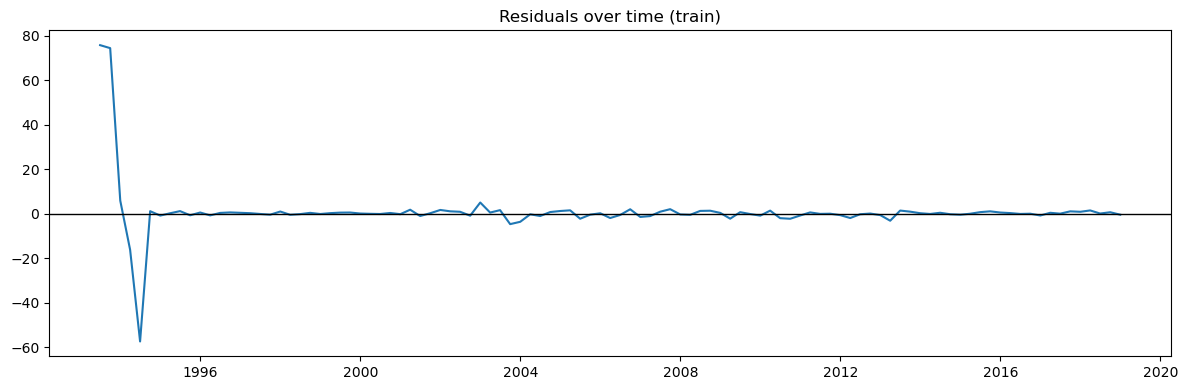

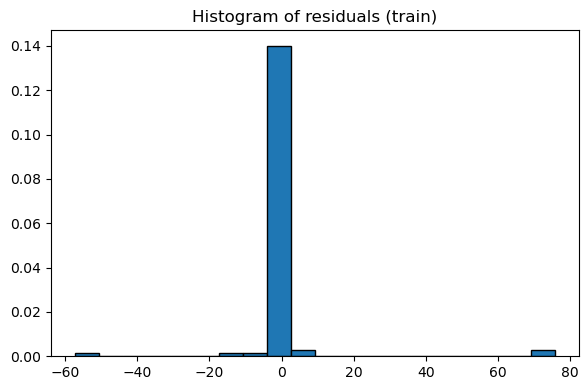

<Figure size 600x400 with 0 Axes>

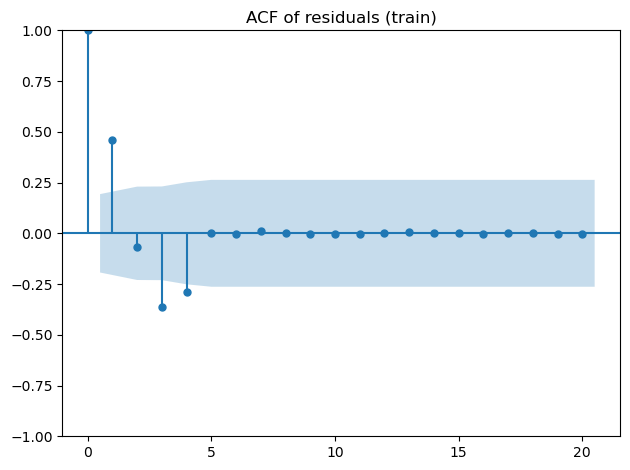

<Figure size 600x400 with 0 Axes>

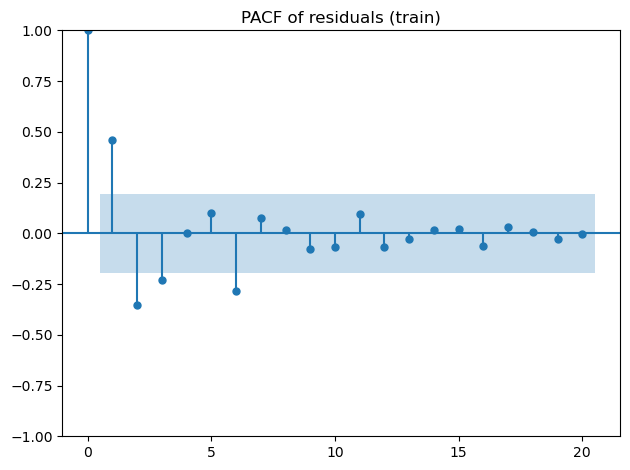

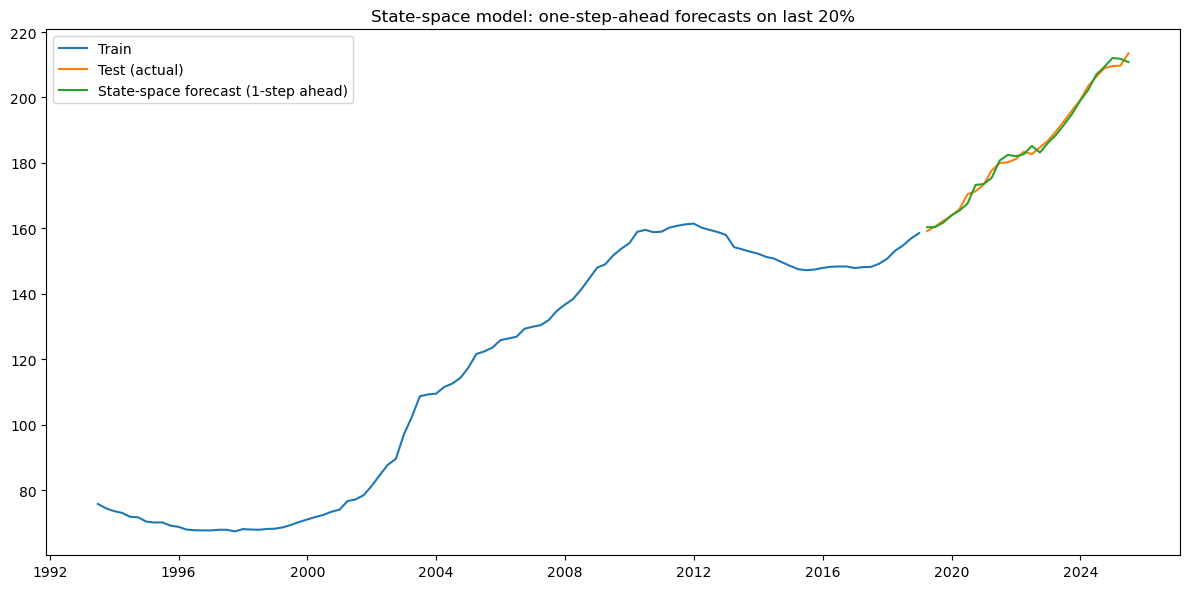

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error


# ===============================
# 0. Prepare data and split
# ===============================
y = military_comp_data["military_comp"].astype(float)

# Optional: enforce quarterly frequency
try:
    y = y.asfreq("Q")
except Exception:
    pass

train_size = int(len(military_comp_data) * 0.8)

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

print(f"Train length: {len(y_train)}, Test length: {len(y_test)}")


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


# ===============================
# 1. Fit state-space model on TRAIN
#    Model: local linear trend + quarterly seasonality
# ===============================
train_mod = UnobservedComponents(
    y_train,
    level="local linear trend",
    seasonal=4  # quarterly
)
train_res = train_mod.fit(disp=False)

print("\n=== Train fit information ===")
print("AIC:", train_res.aic)
print("BIC:", train_res.bic)

# In-sample fitted values and residuals
fitted_train = train_res.fittedvalues
resid_train  = train_res.resid

# In-sample accuracy
train_rmse = rmse(y_train, fitted_train)
train_mae  = mean_absolute_error(y_train, fitted_train)

print("Train RMSE:", train_rmse)
print("Train MAE :", train_mae)


# ===============================
# 2. Rolling one-step-ahead forecasts on TEST
#    (refit expanding window each step)
# ===============================
ss_forecasts = []

for t in range(train_size, len(y)):
    y_sub = y.iloc[:t]  # use data up to time t-1 to forecast t

    ss_mod = UnobservedComponents(
        y_sub,
        level="local linear trend",
        seasonal=4
    )
    ss_res = ss_mod.fit(disp=False)

    pred = ss_res.forecast(steps=1)[0]
    ss_forecasts.append(pred)

ss_forecasts = pd.Series(ss_forecasts, index=y_test.index)

test_rmse = rmse(y_test, ss_forecasts)
test_mae  = mean_absolute_error(y_test, ss_forecasts)

print("\n=== Test (rolling one-step-ahead) accuracy ===")
print("Test RMSE:", test_rmse)
print("Test MAE :", test_mae)


# ===============================
# 3. Residual analysis (TRAIN residuals)
# ===============================
resid = resid_train.dropna()

print("\n=== Residual diagnostics (train) ===")
print("Residual mean:", resid.mean())
print("Residual std :", resid.std())

# Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(resid, lags=[10, 20], return_df=True)
print("\nLjung-Box test (lags 10, 20):")
print(lb_test)

# ---------- Plots ----------
plt.figure(figsize=(12, 4))
plt.plot(resid.index, resid)
plt.axhline(0, color="black", linewidth=1)
plt.title("Residuals over time (train)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(resid, bins=20, edgecolor="k", density=True)
plt.title("Histogram of residuals (train)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(resid, lags=20)
plt.title("ACF of residuals (train)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(resid, lags=20, method="ywm")
plt.title("PACF of residuals (train)")
plt.tight_layout()
plt.show()


# ===============================
# 4. Plot actual vs forecast
# ===============================
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test (actual)")
plt.plot(ss_forecasts.index, ss_forecasts, label="State-space forecast (1-step ahead)")
plt.legend()
plt.title("State-space model: one-step-ahead forecasts on last 20%")
plt.tight_layout()
plt.show()

In [155]:
# 1. Smoothed states as a numpy array (shape: n_states x T)
states = train_res.smoothed_state

# 2. Get the names of each state from the *model*
state_names = train_res.model.state_names
print(state_names)

['level', 'trend', 'seasonal', 'seasonal.L1', 'seasonal.L2']


In [156]:
states_df = pd.DataFrame(
    states.T,  # transpose to shape (T x n_states)
    index=y_train.index,
    columns=state_names
)

In [157]:
level_series  = states_df["level"]    # μ_t
slope_series  = states_df["trend"]    # β_t
seasonal_main = states_df.filter(like="seasonal")  # γ_t and friends

In [158]:
print(level_series)
print(slope_series)
print(seasonal_main)

date
1993-06-30     75.719787
1993-09-30     74.521639
1993-12-31     73.544576
1994-03-31     72.958998
1994-06-30     71.792787
                 ...    
2017-12-31    150.670576
2018-03-31    153.047998
2018-06-30    154.730787
2018-09-30    157.018639
2018-12-31    158.537576
Freq: QE-DEC, Name: level, Length: 103, dtype: float64
date
1993-06-30   -0.988868
1993-09-30   -0.913192
1993-12-31   -0.814419
1994-03-31   -0.798397
1994-06-30   -0.649371
                ...   
2017-12-31    1.658764
2018-03-31    1.730695
2018-06-30    1.819950
2018-09-30    1.740009
2018-12-31    1.740009
Freq: QE-DEC, Name: trend, Length: 103, dtype: float64
            seasonal  seasonal.L1  seasonal.L2
date                                          
1993-06-30  0.036213     0.062002     0.007424
1993-09-30 -0.105639     0.036213     0.062002
1993-12-31  0.007424    -0.105639     0.036213
1994-03-31  0.062002     0.007424    -0.105639
1994-06-30  0.036213     0.062002     0.007424
...              ...   

In [159]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ==============================================
# Time-Series Cross-Validation (Rolling Origin)
# ==============================================

y = military_comp_data["military_comp"].astype(float).asfreq("Q")

# Parameters
initial_train_size = int(len(y) * 0.5)     # first 50% used as initial training window
h = 1                                      # 1-step-ahead forecasting
min_obs_for_fit = 20                       # small safeguard

rmse_folds = []
mae_folds = []
folds = []

for t in range(initial_train_size, len(y) - h):
    y_train_cv = y.iloc[:t]
    y_test_cv  = y.iloc[t:t+h]

    if len(y_train_cv) < min_obs_for_fit:
        continue

    # Fit LLT + seasonality model
    cv_model = UnobservedComponents(
        y_train_cv,
        level="local linear trend",
        seasonal=4
    )
    cv_res = cv_model.fit(disp=False)

    # Forecast h-steps ahead
    fc = cv_res.forecast(steps=h)

    # Compute errors
    rmse_folds.append(rmse(y_test_cv, fc))
    mae_folds.append(mean_absolute_error(y_test_cv, fc))
    folds.append(t)

# Convert results to a tidy DataFrame
tscv_results = pd.DataFrame({
    "Fold": folds,
    "RMSE": rmse_folds,
    "MAE": mae_folds
})

print("\n=== Time-Series Cross-Validation Results ===")
print(tscv_results.head())

print("\n=== Average Performance Across All Folds ===")
print("Mean RMSE:", np.mean(rmse_folds))
print("Mean MAE :", np.mean(mae_folds))

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/3502549194.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  y = military_comp_data["military_comp"].astype(float).asfreq("Q")
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



=== Time-Series Cross-Validation Results ===
   Fold      RMSE       MAE
0    64  0.655267  0.655267
1    65  0.111501  0.111501
2    66  0.835957  0.835957
3    67  1.362278  1.362278
4    68  1.904898  1.904898

=== Average Performance Across All Folds ===
Mean RMSE: 0.8973631859408324
Mean MAE : 0.8973631859408324


In [209]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(a, b):
    return np.sqrt(mean_squared_error(a, b))

def mae(a, b):
    return mean_absolute_error(a, b)

# ------------------------
# Load target series
# ------------------------
y = military_comp_data["military_comp"].astype(float)

try:
    y = y.asfreq("Q")
except:
    pass

# ------------------------
# Helper: fit LLT + forecast
# ------------------------
def llt_forecast(train_series, horizon):
    model = UnobservedComponents(train_series, level="local linear trend", seasonal=4)
    res = model.fit(disp=False)
    fc = res.forecast(steps=horizon)
    return fc

# ------------------------
# Define segments
# ------------------------
n = len(y)
first_cut  = int(n * 0.25)
mid_cut2   = int(n * 0.75)

segments = {
    "Early":  y.iloc[:first_cut],
    "Middle": y.iloc[:mid_cut2],
    "Late":   y.iloc[:-12]  # ensure we can test up to H=12
}

# ------------------------
# Forecast horizons
# ------------------------
H_list = [4, 8, 12]

# ------------------------
# Compute numerical performance
# ------------------------
results = []

for seg_name, seg_data in segments.items():
    for H in H_list:

        if len(seg_data) < H + 10:
            continue

        # Forecast H steps ahead
        fc = llt_forecast(seg_data, H)

        # True values: next H observations in full series
        start_idx = seg_data.index[-1]
        true_index = pd.date_range(start_idx, periods=H+1, freq="Q")[1:]

        # Ensure true_index exists in y
        true = y.reindex(true_index).dropna()
        fc = fc.loc[true.index]

        if len(true) == 0:
            continue

        # Compute errors
        r = rmse(true, fc)
        m = mae(true, fc)

        results.append({
            "Segment": seg_name,
            "Horizon": H,
            "RMSE": r,
            "MAE": m
        })

results_df = pd.DataFrame(results)
print(results_df)

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:18: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: Fut

  Segment  Horizon       RMSE        MAE
0   Early        4   1.446585   1.132973
1   Early        8   6.979931   4.944622
2   Early       12  12.151640   9.487717
3  Middle        4   2.861325   2.195127
4  Middle        8   6.957791   5.727192
5  Middle       12  10.439371   8.833258
6    Late        4   4.658800   4.141016
7    Late        8  10.737573   9.132560
8    Late       12  14.727690  12.909771


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/769902324.py:65: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



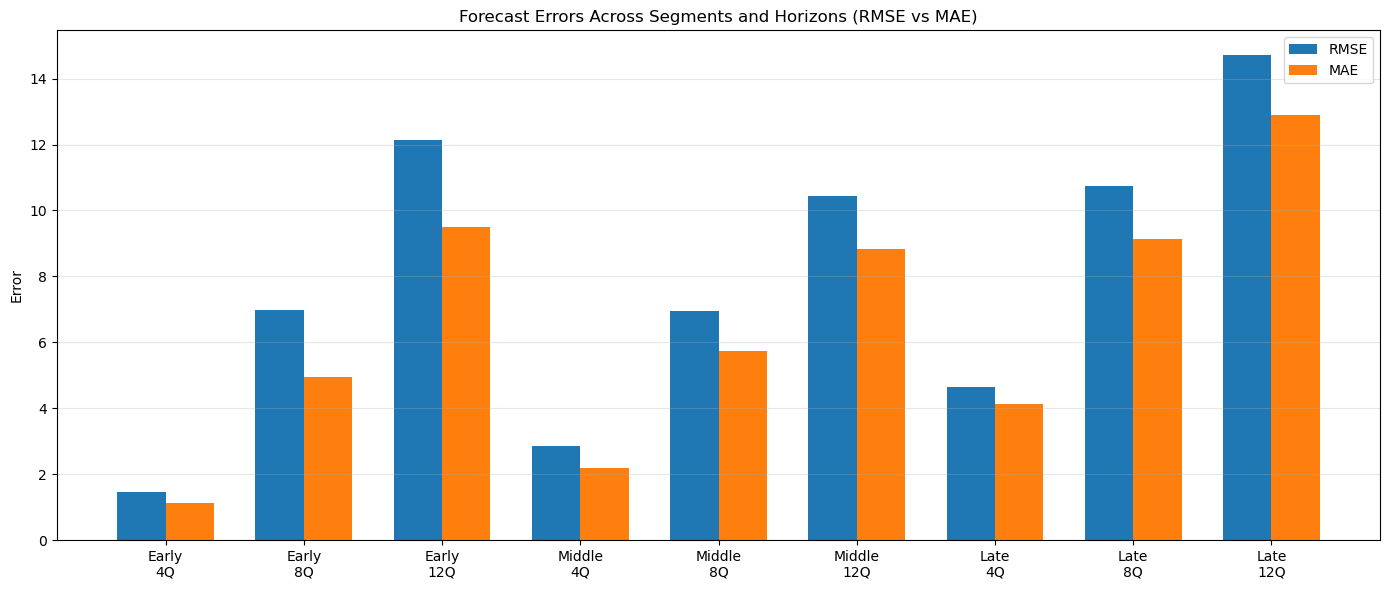

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
data = {
    "Segment": ["Early", "Early", "Early",
                "Middle", "Middle", "Middle",
                "Late", "Late", "Late"],
    "Horizon": [4, 8, 12,
                4, 8, 12,
                4, 8, 12],
    "RMSE": [1.446585, 6.979931, 12.151640,
             2.861325, 6.957791, 10.439371,
             4.658800, 10.737573, 14.727690],
    "MAE":  [1.132973, 4.944622,  9.487717,
             2.195127, 5.727192,  8.833258,
             4.141016, 9.132560, 12.909771]
}

df = pd.DataFrame(data)

# Unique categories
segments = ["Early", "Middle", "Late"]
horizons = [4, 8, 12]

# Build plot
plt.style.use("default")
colors_rmse = "#1f77b4"  # blue
colors_mae  = "#ff7f0e"  # orange

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(df))  # 9 groups
width = 0.35            # width of each bar

# Bars
ax.bar(x - width/2, df["RMSE"], width, label="RMSE", color=colors_rmse)
ax.bar(x + width/2, df["MAE"],  width, label="MAE",  color=colors_mae)

# X-axis labels: combine segment + horizon
labels = [f"{seg}\n{h}Q" for seg, h in zip(df["Segment"], df["Horizon"])]
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)

# Aesthetics
ax.set_title("Forecast Errors Across Segments and Horizons (RMSE vs MAE)")
ax.set_ylabel("Error")
ax.grid(axis="y", alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Full Time-Series Cross-Validation (rolling origin, 1-step ahead)

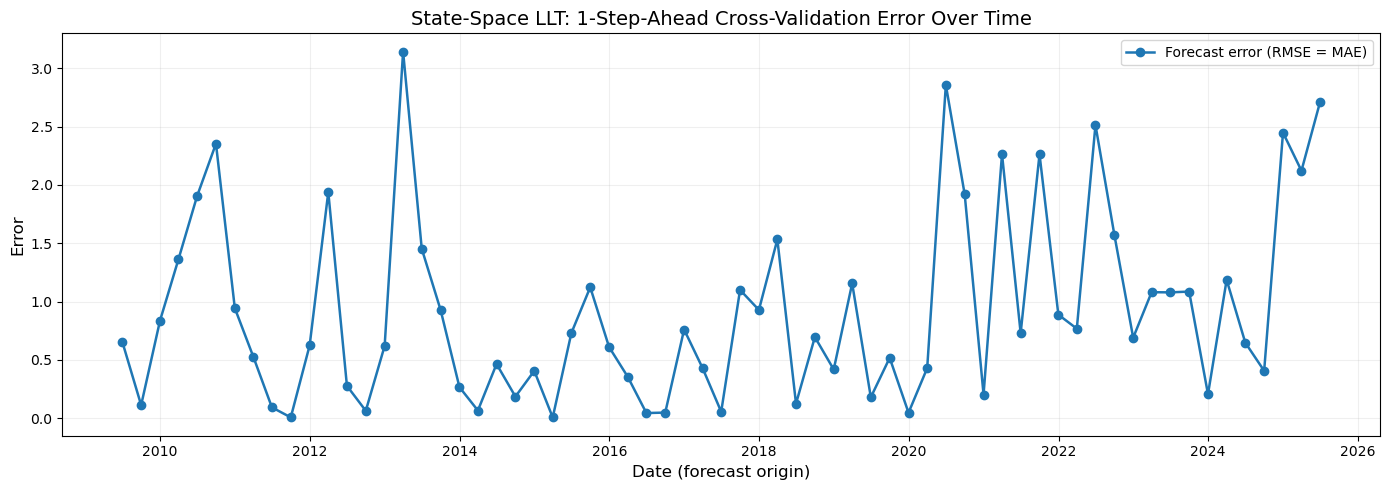

In [206]:
import matplotlib.pyplot as plt

# --- Force pure white background ---
plt.style.use('default')   # reset everything to default (white)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# --- Plot RMSE = MAE curve ---
plt.figure(figsize=(14, 5))

plt.plot(
    tscv_results_1step.index,
    tscv_results_1step["RMSE"],
    marker="o",
    color="tab:blue",
    linewidth=1.8,
    label="Forecast error (RMSE = MAE)"
)

plt.title("State-Space LLT: 1-Step-Ahead Cross-Validation Error Over Time", fontsize=14)
plt.xlabel("Date (forecast origin)", fontsize=12)
plt.ylabel("Error", fontsize=12)

plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/1707793647.py:15: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. 

=== Multi-horizon rolling CV (LLT) ===
H = 1: Mean RMSE = 0.925, Mean MAE = 0.925
H = 4: Mean RMSE = 3.259, Mean MAE = 3.259
H = 8: Mean RMSE = 7.351, Mean MAE = 7.351
H = 12: Mean RMSE = 12.106, Mean MAE = 12.106


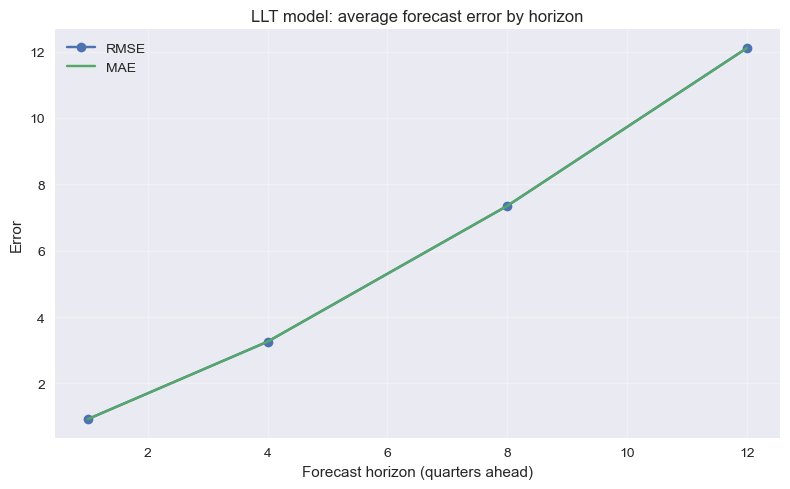


=== LLT Residual Diagnostics AFTER 1996 ===
Residual mean: 0.055609145548971756
Residual std : 1.2890102199768743

Ljung-Box test (lags 10, 20):
      lb_stat  lb_pvalue
10   8.125441   0.616585
20  12.219221   0.908324

Jarque–Bera test:
JB stat: 50.040195716161655   p-value: 1.3611612079985375e-11


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_87626/1550595489.py:15: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



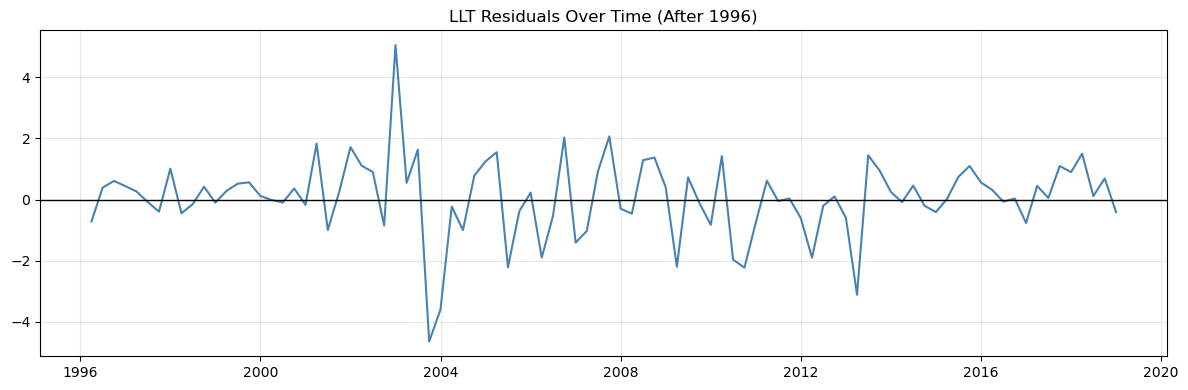

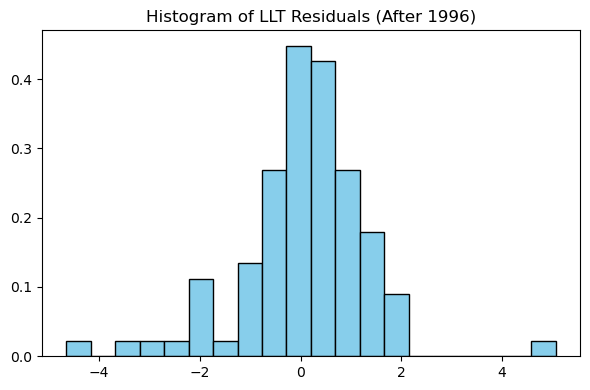

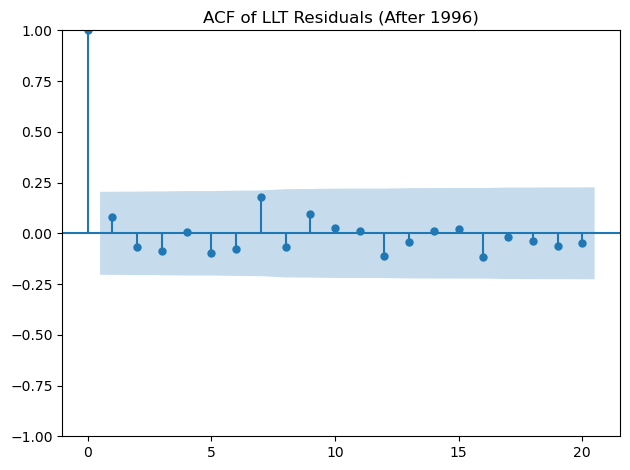

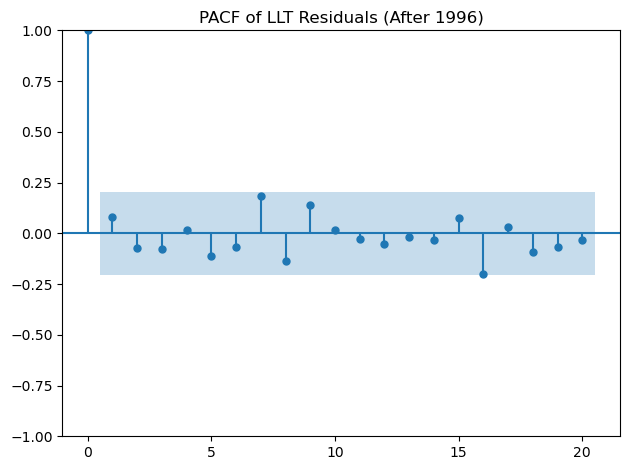

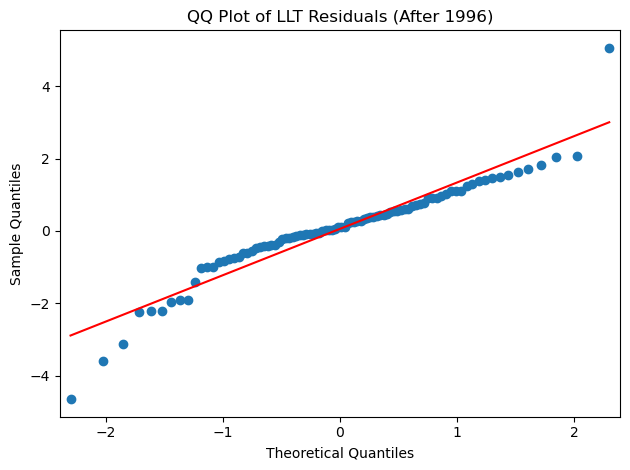

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.gofplots import qqplot

# =========================
# Load and prepare data
# =========================
y = military_comp_data["military_comp"].astype(float)

try:
    y = y.asfreq("Q")
except:
    pass

# Use training window (80%)
train_size = int(len(y) * 0.8)
y_train = y.iloc[:train_size]

# =========================
# Fit LLT model
# =========================
llt_model = UnobservedComponents(y_train, level="local linear trend", seasonal=4)
llt_res = llt_model.fit(disp=False)

# =========================
# Residuals *after 1996*
# =========================
resid = llt_res.resid.dropna()
resid_after_96 = resid[resid.index >= "1996-01-01"]

print("\n=== LLT Residual Diagnostics AFTER 1996 ===")
print("Residual mean:", resid_after_96.mean())
print("Residual std :", resid_after_96.std())

# Ljung-Box test
lb = acorr_ljungbox(resid_after_96, lags=[10, 20], return_df=True)
print("\nLjung-Box test (lags 10, 20):")
print(lb)

# Jarque–Bera
jb_stat, jb_p, _, _ = jarque_bera(resid_after_96)
print("\nJarque–Bera test:")
print("JB stat:", jb_stat, "  p-value:", jb_p)

# =========================
# Diagnostic Plots
# =========================

# 1. Residuals over time
plt.figure(figsize=(12,4))
plt.plot(resid_after_96.index, resid_after_96.values, color="steelblue")
plt.axhline(0, color="black", linewidth=1)
plt.title("LLT Residuals Over Time (After 1996)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Histogram
plt.figure(figsize=(6,4))
plt.hist(resid_after_96, bins=20, density=True, edgecolor="black", color="skyblue")
plt.title("Histogram of LLT Residuals (After 1996)")
plt.tight_layout()
plt.show()

# 3. ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(resid_after_96, lags=20)
plt.title("ACF of LLT Residuals (After 1996)")
plt.tight_layout()
plt.show()

# 4. PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(resid_after_96, lags=20, method="ywm")
plt.title("PACF of LLT Residuals (After 1996)")
plt.tight_layout()
plt.show()

# 5. QQ plot
qqplot(resid_after_96, line='s')
plt.title("QQ Plot of LLT Residuals (After 1996)")
plt.tight_layout()
plt.show()

In [1]:
# Cell 4 — Bootstrap forecast intervals for LLT (residual bootstrap on test)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data, train/test split
y = military_comp_data["military_comp"].astype(float)
try:
    y = y.asfreq("Q")
except Exception:
    pass

train_size = int(len(y) * 0.8)
y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

# Fit LLT on train
llt_model = UnobservedComponents(y_train, level="local linear trend", seasonal=4)
llt_res = llt_model.fit(disp=False)

# Deterministic forecast (mean)
fc_mean = llt_res.forecast(steps=len(y_test))

# Residuals for bootstrap
resid = llt_res.resid.dropna()
resid_centered = resid - resid.mean()

B = 500  # number of bootstrap replications
boot_paths = np.zeros((B, len(y_test)))

rng = np.random.default_rng(seed=123)

for b in range(B):
    # Sample residuals with replacement
    boot_eps = rng.choice(resid_centered.values, size=len(y_test), replace=True)
    # Construct bootstrap path: forecast mean + resampled noise
    boot_paths[b, :] = fc_mean.values + boot_eps

# Compute pointwise intervals
lower = np.percentile(boot_paths, 2.5, axis=0)
upper = np.percentile(boot_paths, 97.5, axis=0)

# Coverage check
inside = ((y_test.values >= lower) & (y_test.values <= upper)).mean()
print(f"Approximate empirical coverage of 95% interval: {inside*100:.1f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y.index, y.values, label="Actual", color="C0")
plt.plot(y_test.index, fc_mean.values, label="LLT forecast (mean)", color="C3")
plt.fill_between(y_test.index, lower, upper, color="C3", alpha=0.2, label="Bootstrap 95% interval")
plt.axvline(y_test.index[0], color="gray", linestyle="--", alpha=0.7)
plt.title("LLT model: bootstrap forecast intervals on test sample")
plt.xlabel("Date")
plt.ylabel("Military compensation")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'military_comp_data' is not defined

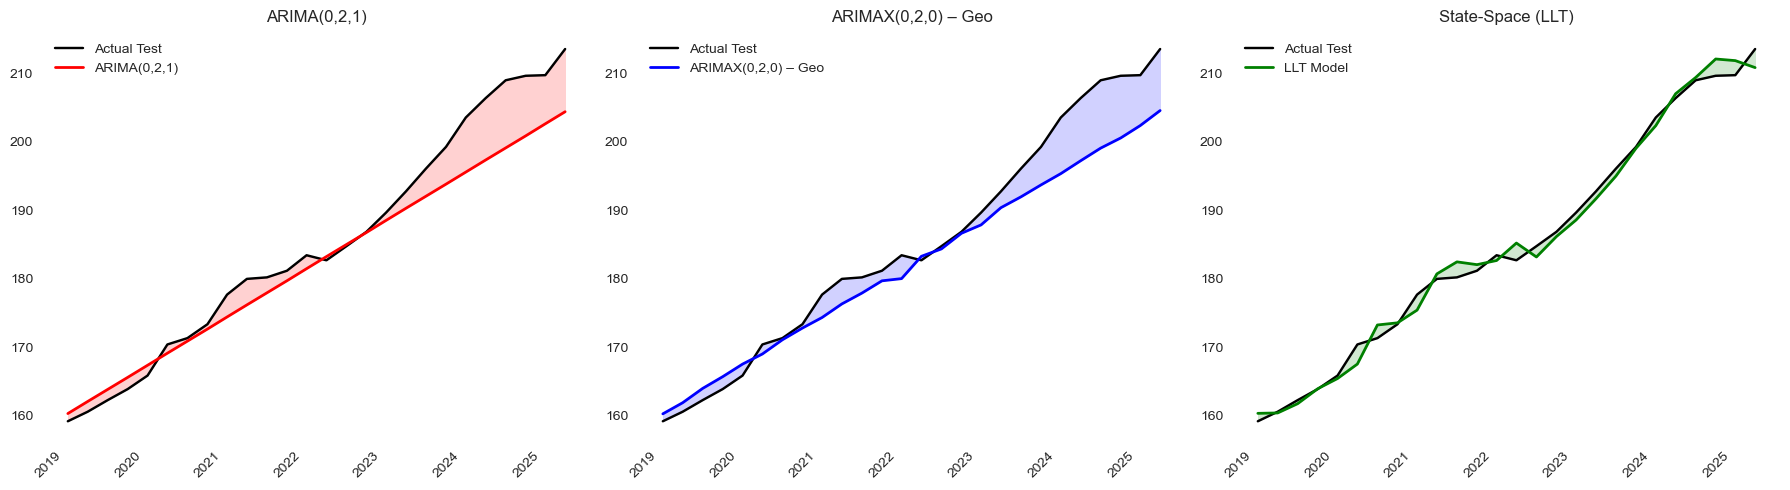

In [179]:
import matplotlib.pyplot as plt

# --- Create horizontal inline layout ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor="white")

# --- Style: white background on each subplot ---
for ax in axes:
    ax.set_facecolor("white")

# ================================
# 1. ARIMA(0,2,1)
# ================================
axes[0].plot(test_data.index, test_data, color="black", label="Actual Test")
axes[0].plot(arima_forecast.index, arima_forecast, color="red", linewidth=2,
             label="ARIMA(0,2,1)")  # solid line
axes[0].fill_between(
    test_data.index,
    test_data.values,
    arima_forecast.values,
    color="red",
    alpha=0.18
)
axes[0].set_title("ARIMA(0,2,1)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()

# ================================
# 2. ARIMAX(0,2,0) – Geo
# ================================
axes[1].plot(test_data.index, test_data, color="black", label="Actual Test")
axes[1].plot(arimax_geo_forecast.index, arimax_geo_forecast, color="blue", linewidth=2,
             label="ARIMAX(0,2,0) – Geo")  # solid line
axes[1].fill_between(
    test_data.index,
    test_data.values,
    arimax_geo_forecast.values,
    color="blue",
    alpha=0.18
)
axes[1].set_title("ARIMAX(0,2,0) – Geo")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()

# ================================
# 3. State-Space (LLT)
# ================================
axes[2].plot(test_data.index, test_data, color="black", label="Actual Test")
axes[2].plot(ss_forecasts.index, ss_forecasts, color="green", linewidth=2,
             label="LLT Model")  # solid line
axes[2].fill_between(
    test_data.index,
    test_data.values,
    ss_forecasts.values,
    color="green",
    alpha=0.18
)
axes[2].set_title("State-Space (LLT)")
axes[2].tick_params(axis="x", rotation=45)
axes[2].legend()

plt.tight_layout()
plt.show()

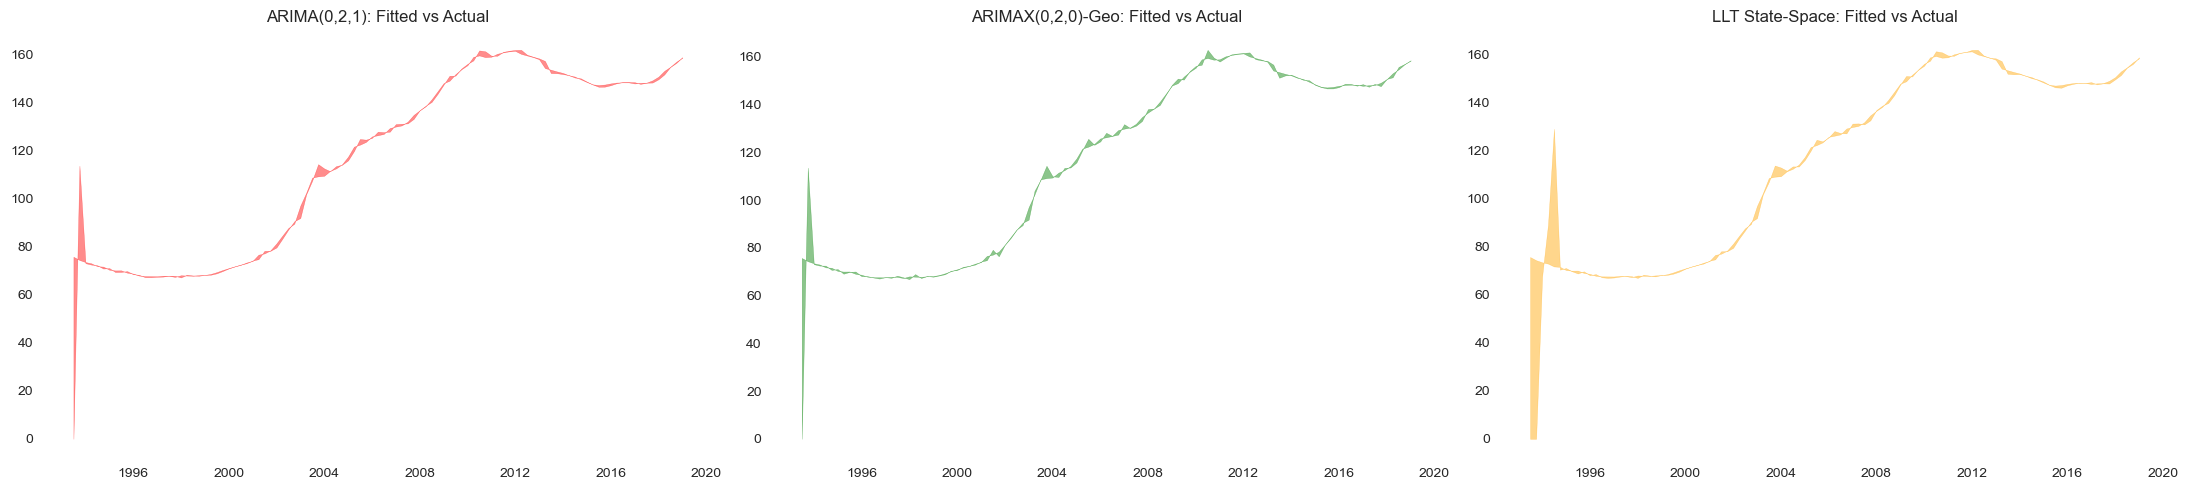

In [193]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(22, 5), facecolor="white")  # <-- explicit white background

# -------------------------------------------------------------------
# Helper function: plot ONLY shading (no lines)
# -------------------------------------------------------------------
def plot_shading(ax, x, actual, fitted, color, title):
    ax.fill_between(x, actual, fitted, color=color, alpha=0.45)
    ax.set_facecolor("white")        # <-- ensure axes background white
    ax.set_title(title)
    ax.grid(alpha=0.3)


# ================================================================
# 1) ARIMA(0,2,1)
# ================================================================
ax1 = plt.subplot(1, 3, 1)

plot_shading(
    ax1,
    train_data.index,
    train_data.values,
    arima_model_fit.fittedvalues,
    color="red",
    title="ARIMA(0,2,1): Fitted vs Actual"
)


# ================================================================
# 2) ARIMAX(0,2,0)-Geo
# ================================================================
ax2 = plt.subplot(1, 3, 2)

plot_shading(
    ax2,
    train_data.index,
    train_data.values,
    arimax_geo_model_fit.fittedvalues,
    color="green",
    title="ARIMAX(0,2,0)-Geo: Fitted vs Actual"
)


# ================================================================
# 3) STATE-SPACE LLT
# ================================================================
ax3 = plt.subplot(1, 3, 3)

plot_shading(
    ax3,
    y_train.index,
    y_train.values,
    train_res.fittedvalues,
    color="orange",
    title="LLT State-Space: Fitted vs Actual"
)

plt.tight_layout()
plt.show()